In [2]:
import os
import pandas as pd 
import numpy as np
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import PLSCanonical, PLSRegression, CCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate, cross_val_score
import matplotlib  as mpl
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.max_open_warning': 0})
from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms
%matplotlib inline
import os, shutil, glob
from PIL import Image
from itertools import cycle
from random import randint
import re, math
import seaborn as sns; sns.set_style("white")
from sklearn.manifold import TSNE
import umap.umap_ as umap
import datetime
import gc
from pathlib import Path

import plotnine as gg
from cytominer_eval import evaluate
import plotly.graph_objects as go
import plotly.offline as pyo
import plotly.io as pio
pio.renderers

os.getcwd()

'/home/jovyan/Christa/FromMaris'

In [3]:
figformat = "png"
dpi = 150


In [4]:
def confidence_ellipse(x, y, ax, n_std=2.0, facecolor="none", **kwargs):

    if x.size != y.size:
        raise ValueError("x and y must be the same size")

    cov = np.cov(x, y)
    pearson = cov[0, 1] / np.sqrt(cov[0, 0] * cov[1, 1])

    ell_radius_x = np.sqrt(1 + pearson)
    ell_radius_y = np.sqrt(1 - pearson)
    ellipse = Ellipse(
        (0, 0),
        width=ell_radius_x * 2,
        height=ell_radius_y * 2,
        facecolor=facecolor,
        **kwargs
    )

    scale_x = np.sqrt(cov[0, 0]) * n_std
    mean_x = np.mean(x)

    scale_y = np.sqrt(cov[1, 1]) * n_std
    mean_y = np.mean(y)

    transf = (
        transforms.Affine2D()
        .rotate_deg(45)
        .scale(scale_x, scale_y)
        .translate(mean_x, mean_y)
    )

    ellipse.set_transform(transf + ax.transData)
    return ax.add_patch(ellipse)


### Set output directory

In [5]:
OutputDir = input("Enter name for output folder: ")  #
if not os.path.exists(OutputDir):
    os.makedirs(OutputDir)


### Read data

In [6]:
BaseDir = "./ImageMedianFeatures/"
sorted(os.listdir(BaseDir))


['ImageMediansAllPlates.csv',
 'ImageMediansPlatecolo44-v1-FA-P017365-CACO2-48h-P1-L1.csv',
 'ImageMediansPlatecolo44-v1-FA-P017366-CACO2-48h-P1-L2.csv',
 'ImageMediansPlatecolo44-v1-FA-P017367-CACO2-48h-P2-L1.csv',
 'ImageMediansPlatecolo44-v1-FA-P017368-CACO2-48h-P2-L2.csv']

In [7]:
df = pd.read_csv("{}/ImageMediansAllPlates.csv".format(BaseDir), sep=";", index_col=0)
df.head(1)


,ImageNumber_nuclei,ObjectNumber_nuclei,Metadata_Site_nuclei,AreaShape_Area_nuclei,AreaShape_BoundingBoxArea_nuclei,AreaShape_BoundingBoxMaximum_X_nuclei,AreaShape_BoundingBoxMaximum_Y_nuclei,AreaShape_BoundingBoxMinimum_X_nuclei,AreaShape_BoundingBoxMinimum_Y_nuclei,AreaShape_Center_X_nuclei,...,RadialDistribution_ZernikePhase_illumSYTO_8_0_cytoplasm,RadialDistribution_ZernikePhase_illumSYTO_8_2_cytoplasm,RadialDistribution_ZernikePhase_illumSYTO_8_4_cytoplasm,RadialDistribution_ZernikePhase_illumSYTO_8_6_cytoplasm,RadialDistribution_ZernikePhase_illumSYTO_8_8_cytoplasm,RadialDistribution_ZernikePhase_illumSYTO_9_1_cytoplasm,RadialDistribution_ZernikePhase_illumSYTO_9_3_cytoplasm,RadialDistribution_ZernikePhase_illumSYTO_9_5_cytoplasm,RadialDistribution_ZernikePhase_illumSYTO_9_7_cytoplasm,RadialDistribution_ZernikePhase_illumSYTO_9_9_cytoplasm
ImageID,,,,,,,,,,,,,,,,,,,,,
colo44-v1-FA-P017365-CACO2-48h-P1-L1_B02_1,1.0,53.5,1.0,1860.0,2597.0,1062.5,806.5,1017.5,764.5,1037.132364,...,1.570796,-0.803829,0.171201,-0.542558,1.492466,-0.100184,0.658361,-0.035433,0.043947,0.426303


#### Comments to Christa
My barcode table is all wrong. 
It has a really hard time connecting my two tables. 

In [8]:
df["barcode"] = df.index.str[:40]
df["well_id"] = df.index.str[-5:-2]
##df['plateWell'] = df['barcode'] + '_' + df['well_id']
df["plateWell"] = df["barcode"]
df["site"] = df.index.str[-1:]


In [9]:
Layout = pd.read_csv("colopaint44-v1-metadata.csv", sep=",")
Layout.head(1)


,layout_id,well_id,batch_id,solvent,stock_conc,stock_conc_unit,cmpd_vol,cmpd_vol_unit,well_vol,well_vol_unit,pert_type,cmpd_conc,cmpd_conc_unit,batchid,cbkid,libid,libtxt,smiles,inchi,inkey
0,colo44-v1-FA-P017365-CACO2-48h-P1-L1,B02,PHB000015,dmso,10.0,mM,7.5,nL,30,uL,poscon,2.5,uM,PHB000015,[tetr],[tetr],pharmb_io,NaN,NaN,NaN


In [10]:
Layout["plateWell"] = Layout["layout_id"] + "_" + Layout["well_id"]
Layout.head(1)


,layout_id,well_id,batch_id,solvent,stock_conc,stock_conc_unit,cmpd_vol,cmpd_vol_unit,well_vol,well_vol_unit,...,cmpd_conc,cmpd_conc_unit,batchid,cbkid,libid,libtxt,smiles,inchi,inkey,plateWell
0,colo44-v1-FA-P017365-CACO2-48h-P1-L1,B02,PHB000015,dmso,10.0,mM,7.5,nL,30,uL,...,2.5,uM,PHB000015,[tetr],[tetr],pharmb_io,NaN,NaN,NaN,colo44-v1-FA-P017365-CACO2-48h-P1-L1_B02


In [11]:
cmpd_concDict = dict(zip(Layout.plateWell, Layout.cmpd_conc))
pert_typeDict = dict(zip(Layout.plateWell, Layout.pert_type))
cbkidDict = dict(zip(Layout.plateWell, Layout.cbkid))
# OLA_concDict = dict(zip(Layout.plateWell, Layout.OLA_conc))
# SAS_concDict = dict(zip(Layout.plateWell, Layout.SAS_conc))


In [12]:
# labels = ['compound_conc', 'pert_type', 'OLA_conc', 'SAS_conc']
# for a in labels:
#     df[a] = df['plateWell'].map(eval('{}Dict'.format(a)))

labels = ["cmpd_conc", "pert_type", "cbkid"]
for a in labels:
    df[a] = df["plateWell"].map(eval("{}Dict".format(a)))


print(df["plateWell"])
print(eval("cbkidDict"))
# print(Layout.head(1))


Not sure what it does except for deleting my data

In [13]:
# df.dropna(inplace=True)
# df.reset_index(drop=False, inplace=True)
# df.tail(1)


In [14]:
cmpd_concDictList = sorted(list(set(df["cmpd_conc"])))
print(cmpd_concDictList)
# PertTypeList = sorted(list(set(df['pert_type'])))
# print(PertTypeList)


[0.00833, 0.0333, 0.1, 0.333, 1.0, 2.5, 10.0]


In [15]:
# df['compound'] = df['cmpd_conc'].str.split('_').str[0]
# df['conc'] = df['cmpd_conc'].str.split('_').str[1].astype(float)
df["conc"] = df["cmpd_conc"].astype(float)
df["compound"] = df["cbkid"].str[:6]
# df['conc2'] = df['cmpd_conc'].str.split('_').str[3].astype(float)
# df['conc2'] = df['conc2'].fillna(0)
# df['combination'] = np.where(df['cmpd_conc'].str.split('_').str[3].astype(float) > 0, 'yes', 'no')


### QC


In [16]:
QC = pd.read_csv("./QC/colo44_Flags.csv", sep=";")
QC["ImageID"] = (
    QC["Metadata_Barcode"]
    + "_"
    + QC["Metadata_Well"]
    + "_"
    + QC["Metadata_Site"].astype(str)
)
QC.head(3)


,Unnamed: 0,Metadata_Barcode,Metadata_Well,Metadata_Site,Count_nuclei,ImageQuality_PercentMaximal_CONC,ImageQuality_PercentMaximal_HOECHST,ImageQuality_PercentMaximal_MITO,ImageQuality_PercentMaximal_PHAandWGA,ImageQuality_PercentMaximal_SYTO,OutlierScaled_FocusScore_-2.0_5.0,OutlierScaled_MeanIntensity_-2.2_4.0,OutlierScaled_PercentMaximal_-2.0_7.5,OutlierScaled_PowerLogLogSlope_-3.5_3.5,OutlierScaled_StdIntensity_-3.3_3.3,Total,Total.1,ImageID
0,0,colo44-v1-FA-P017365-CACO2-48h-P1-L1,B02,1,74.0,0.004994,0.000021,0.198667,0.090964,0.292245,0,0,0,0,0,0,0,colo44-v1-FA-P017365-CACO2-48h-P1-L1_B02_1
1,1,colo44-v1-FA-P017365-CACO2-48h-P1-L1,B02,2,123.0,0.004951,0.000021,0.003558,0.052533,0.110747,0,0,0,0,0,0,0,colo44-v1-FA-P017365-CACO2-48h-P1-L1_B02_2
2,2,colo44-v1-FA-P017365-CACO2-48h-P1-L1,B02,3,148.0,0.003601,0.000021,0.000343,0.080097,0.143497,0,0,0,0,0,0,0,colo44-v1-FA-P017365-CACO2-48h-P1-L1_B02_3


In [17]:
df = df.merge(
    QC[["ImageID", "Total", "Count_nuclei"]],
    left_on="ImageID",
    right_on="ImageID",
    how="left",
)
df = df[df["Total"] == 0]


In [18]:
df.reset_index(drop=True, inplace=True)
df["WellID"] = df["ImageID"].str[:-2]
df.tail(2)


,ImageID,ImageNumber_nuclei,ObjectNumber_nuclei,Metadata_Site_nuclei,AreaShape_Area_nuclei,AreaShape_BoundingBoxArea_nuclei,AreaShape_BoundingBoxMaximum_X_nuclei,AreaShape_BoundingBoxMaximum_Y_nuclei,AreaShape_BoundingBoxMinimum_X_nuclei,AreaShape_BoundingBoxMinimum_Y_nuclei,...,plateWell,site,cmpd_conc,pert_type,cbkid,conc,compound,Total,Count_nuclei,WellID
10697,colo44-v1-FA-P017368-CACO2-48h-P2-L2_O23_8,1.0,46.0,8.0,2711.0,3575.0,1312.0,1174.0,1258.0,1129.0,...,colo44-v1-FA-P017368-CACO2-48h-P2-L2_O23,8,10.0,trt,Veliparib,10.0,Velipa,0,59.0,colo44-v1-FA-P017368-CACO2-48h-P2-L2_O23
10698,colo44-v1-FA-P017368-CACO2-48h-P2-L2_O23_9,1.0,38.0,9.0,2065.0,2852.0,843.0,1685.0,796.0,1650.0,...,colo44-v1-FA-P017368-CACO2-48h-P2-L2_O23,9,10.0,trt,Veliparib,10.0,Velipa,0,57.0,colo44-v1-FA-P017368-CACO2-48h-P2-L2_O23


In [19]:
print(sorted(list(set(df["compound"]))))


['5-Fluo', '5Z-7-O', 'ABT-73', 'AMG 23', 'AZD454', 'AZD776', 'AZD805', 'Abemac', 'Afatin', 'BMS-75', 'Crizot', 'Dabraf', 'Encora', 'Gefiti', 'LGK974', 'LY2603', 'Linsit', 'MK-177', 'MK-220', 'Navito', 'Nutlin', 'Olapar', 'Oxalip', 'PD0325', 'PI-103', 'Paclit', 'Palboc', 'Ruxoli', 'SB2167', 'SB5051', 'SN-38', 'Sapiti', 'Taseli', 'Temozo', 'Tramet', 'Velipa', 'Vinore', '[berb]', '[dmso]', '[etop]', '[fenb]', '[flup]', '[tetr]', 'alpeli', 'binime', 'cobime', 'regora', 'tricir', 'triflu', 'vemura']


In [20]:
dfViability = df[['conc', 'compound', 'cbkid', 'site', 'plateWell', 'Count_nuclei','ObjectNumber_cells']]

In [21]:
dfViability.head(2)

,conc,compound,cbkid,site,plateWell,Count_nuclei,ObjectNumber_cells
0,2.5,[tetr],[tetr],1,colo44-v1-FA-P017365-CACO2-48h-P1-L1_B02,74.0,24.5
1,2.5,[tetr],[tetr],2,colo44-v1-FA-P017365-CACO2-48h-P1-L1_B02,123.0,40.0


In [22]:
dfViability.to_csv("{}/viability_scores.csv".format(OutputDir), sep=";")

## Boxplots for single compounds

In [23]:
# df_single = df[df['combination'] == 'no']
# df_single.reset_index(drop=True, inplace=True)
# df_single.shape


In [24]:
# print(sorted(list(set(df_single['compound']))))


In [25]:
CompoundList = sorted(list(set(df["compound"])))  # remove 'SASfiltered'
CompoundList.remove('[dmso]')


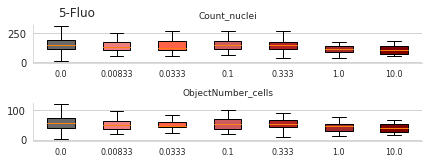

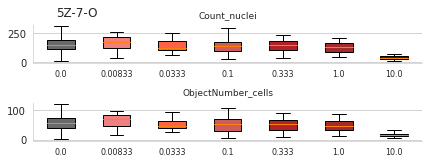

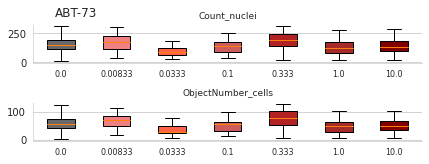

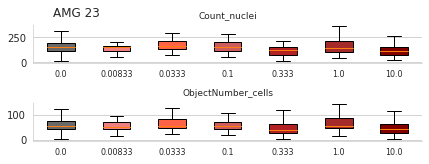

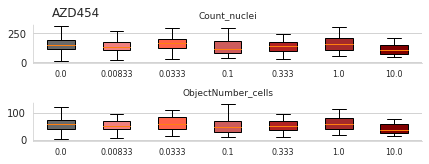

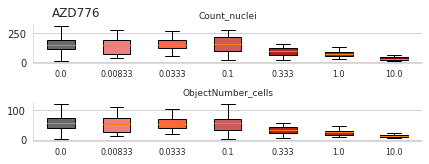

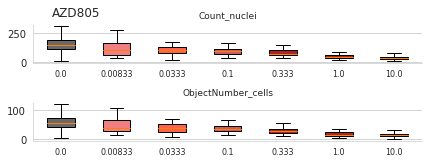

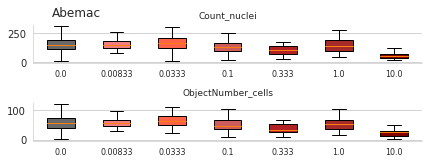

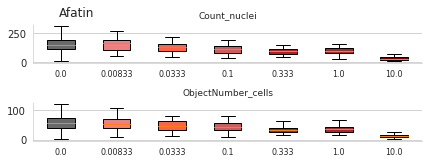

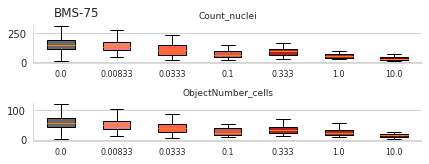

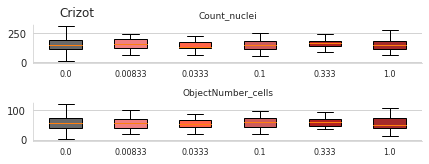

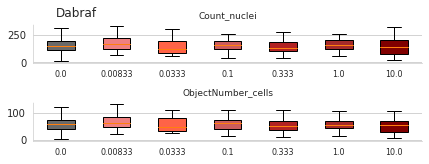

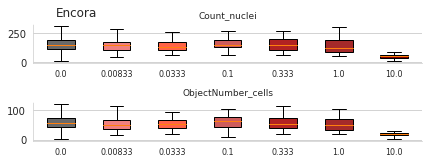

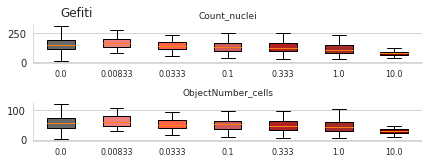

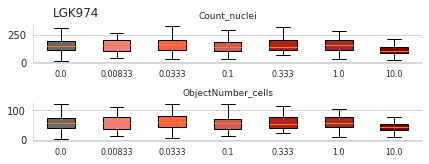

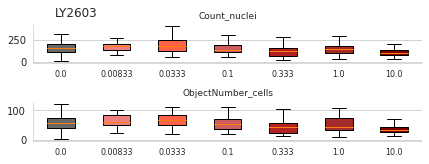

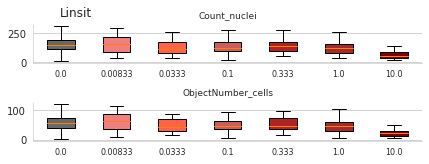

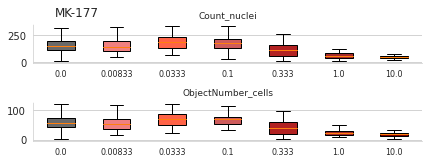

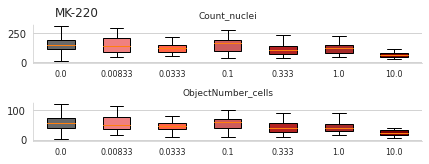

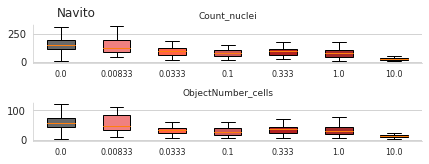

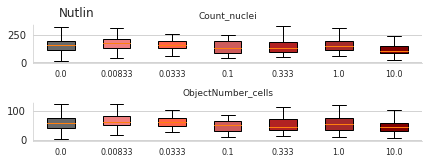

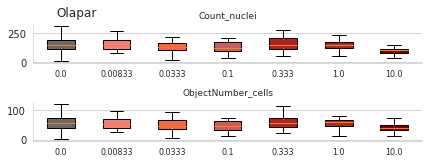

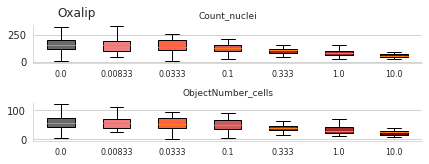

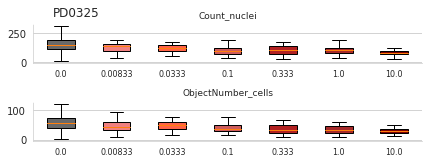

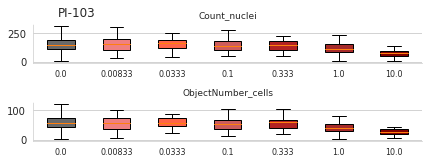

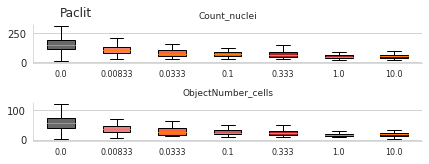

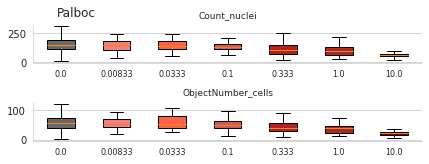

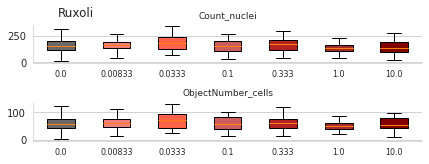

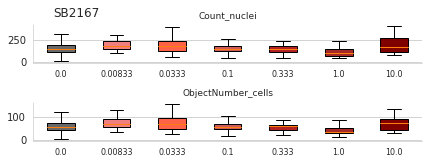

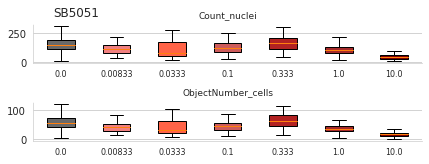

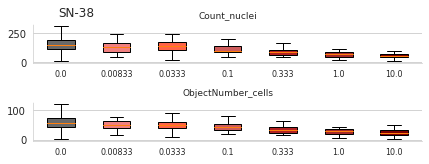

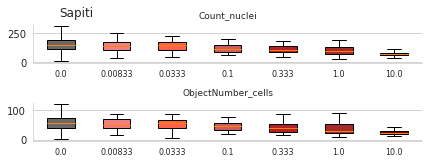

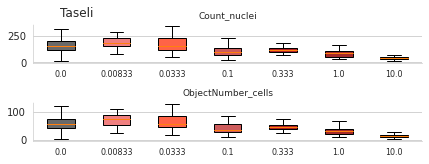

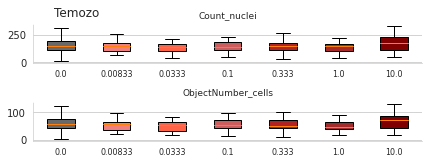

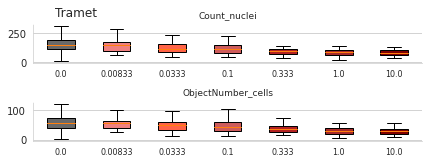

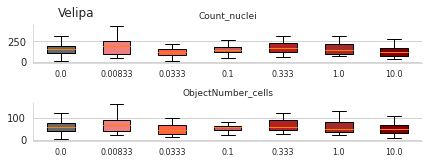

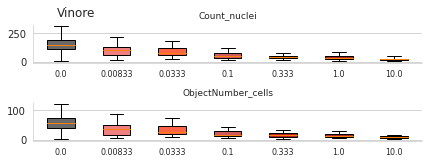

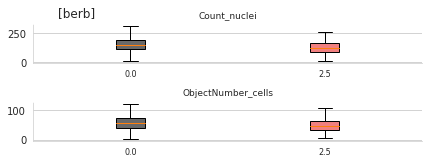

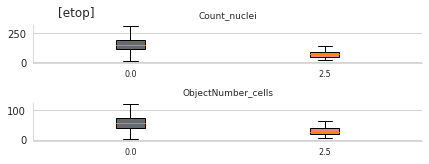

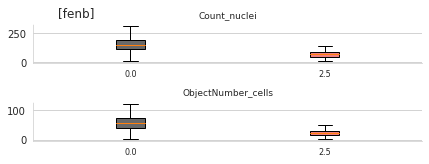

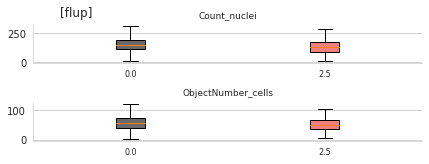

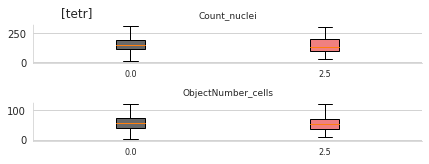

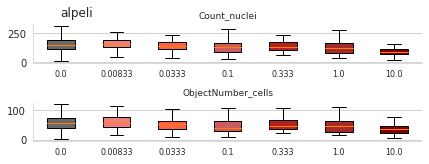

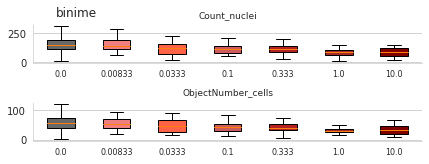

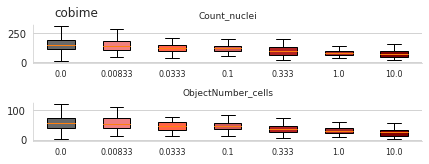

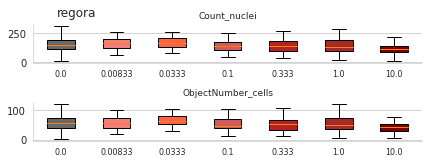

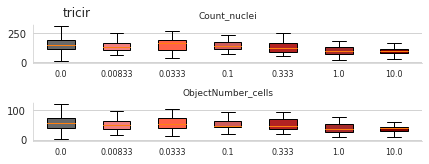

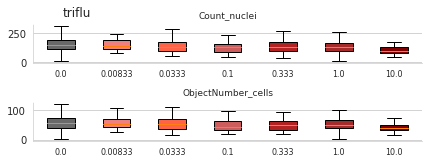

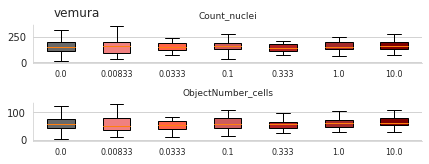

In [26]:

FeatureList = ['Count_nuclei','ObjectNumber_cells']
colorList = ['lightcoral', 'tomato', 'indianred', 'firebrick', 'brown', 'maroon']
    
for comp in (CompoundList[:]):
    dfOneCompound = df.loc[(df['compound'] == comp), ['compound','conc']+ FeatureList]
    dfDMSO = df.loc[(df['compound'] == '[dmso]'), ['compound','conc']+ FeatureList]
    dfDMSO['conc'] = 0
                
    frames = [dfDMSO, dfOneCompound]
    dfOneCompoundandDMSO = pd.concat(frames, sort=False)
    dfOneCompoundandDMSO.sort_values(by = ['conc'], inplace = True)
    CompConcList = sorted(list(dict.fromkeys(list(dfOneCompoundandDMSO['conc']))))
    Legend = CompConcList
        
    fig = plt.figure(figsize = (6,3))
    fig.suptitle('{}'.format(comp), fontsize = 12, x=0.1)
    sp = 1
    for index, feature in enumerate(FeatureList):
        #colors = ['dimgray'] + [colorList[index]]*(len(CompConcList)-1)
        colors = ['dimgray'] + colorList
        ax = fig.add_subplot(3, math.ceil(len(FeatureList)/3),sp) 
        concentrations_thiscompound = []
        for comp_conc in  CompConcList:
            concentrations_thiscompound.append(dfOneCompoundandDMSO.loc[(dfOneCompoundandDMSO['conc'] == comp_conc)][feature].values)
        concentrations_thiscompound = np.array(concentrations_thiscompound, dtype=object)
        ax.set_title(feature, fontsize = 9, loc = 'center')
        bplot = ax.boxplot(concentrations_thiscompound, patch_artist=True, flierprops = None, showfliers=False)
        ax.set_xticklabels(labels=Legend, rotation = 0, fontsize=8)

        ax.set_facecolor('w')
        ax.spines['bottom'].set_color('lightgrey')
        ax.spines['top'].set_color('w')
        ax.spines['left'].set_color('lightgrey')
        ax.spines['right'].set_color('w')
        ax.grid(visible=True, which='major', axis='y', color='lightgrey', linewidth=1)
        if sp == 3:
            ax.set_ylim([0, None])
        sp = sp + 1
        #plt.grid(axis = 'y')
        for patch, color in zip(bplot['boxes'], colors):
            patch.set_facecolor(color)
    plt.subplots_adjust(top=0.90,  wspace=0,  hspace=1, bottom=0.0, left =0.0)
    fig.savefig('{}/{}.{}'.format(OutputDir, comp, 'png'),  dpi=150, bbox_inches='tight')

 ### Specify feature columns

In [27]:
numeric_columns = list()
for a in df.columns:
    if (df.dtypes[a] == "float64") | (df.dtypes[a] == "int64"):
        numeric_columns.append(a)
print("Found {} numeric columns".format(len(numeric_columns)))


Found 2189 numeric columns


In [28]:
feature_columns = [
    fc
    for fc in numeric_columns
    if ("Metadata" not in fc) & ("Number" not in fc) & ("conc" not in fc)
]
print('Excluded columns that are "Metadata", etc.: {}'.format(len(feature_columns)))
X = df.loc[:, feature_columns]
X = X.loc[:, ((X.std() > 0.0001) & (X.std() < 100000))]
print("Excluded features with SD < 0.0001 and SD > 100000: {}".format(X.shape[1]))
X.dropna(axis=1, inplace=True)
print("Removed features with missing values: {}".format(X.shape[1]))
varying_features = list(X.columns)


Excluded columns that are "Metadata", etc.: 2166
Excluded features with SD < 0.0001 and SD > 100000: 2040
Removed features with missing values: 2040


In [29]:
varying_features[-5:]


['RadialDistribution_ZernikePhase_illumSYTO_9_3_cytoplasm',
 'RadialDistribution_ZernikePhase_illumSYTO_9_5_cytoplasm',
 'RadialDistribution_ZernikePhase_illumSYTO_9_7_cytoplasm',
 'RadialDistribution_ZernikePhase_illumSYTO_9_9_cytoplasm',
 'Count_nuclei']

### PCA for negcon and poscon

In [30]:
dfPart = df.loc[df["pert_type"].str.contains("con")]
dfPart.reset_index(inplace=True, drop=True)
dfPart.tail(1)


,ImageID,ImageNumber_nuclei,ObjectNumber_nuclei,Metadata_Site_nuclei,AreaShape_Area_nuclei,AreaShape_BoundingBoxArea_nuclei,AreaShape_BoundingBoxMaximum_X_nuclei,AreaShape_BoundingBoxMaximum_Y_nuclei,AreaShape_BoundingBoxMinimum_X_nuclei,AreaShape_BoundingBoxMinimum_Y_nuclei,...,plateWell,site,cmpd_conc,pert_type,cbkid,conc,compound,Total,Count_nuclei,WellID
1534,colo44-v1-FA-P017368-CACO2-48h-P2-L2_O19_9,1.0,60.5,9.0,2260.5,3307.5,973.0,824.5,897.5,764.5,...,colo44-v1-FA-P017368-CACO2-48h-P2-L2_O19,9,0.1,negcon,[dmso],0.1,[dmso],0,88.0,colo44-v1-FA-P017368-CACO2-48h-P2-L2_O19


In [31]:
pca = PCA(n_components=4)
x = dfPart.loc[:, varying_features[:]].values
x = StandardScaler().fit_transform(x)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data=principalComponents)
principalDf.rename(
    columns={
        0: "principal component 1",
        1: "principal component 2",
        2: "principal component 3",
        3: "principal component 4",
    },
    inplace=True,
)
principalDf.tail(1)


,principal component 1,principal component 2,principal component 3,principal component 4
1534,-10.714414,13.368186,-19.894655,4.143169


In [32]:
principalDf = principalDf.merge(
    dfPart[["compound", "conc", "pert_type", "ImageID", "barcode", "well_id", "site"]],
    left_index=True,
    right_index=True,
)


In [33]:
principalDf.to_csv("{}/PCA_negcon_poscon.csv".format(OutputDir), sep=";")


In [34]:
sorted(list(set(principalDf["compound"])), reverse=True)


['[tetr]', '[flup]', '[fenb]', '[etop]', '[dmso]', '[berb]']

In [35]:
targets = sorted(list(set(principalDf["compound"])), reverse=True)
colors = ["lime", "blue", "red", "magenta", "teal", "black", "yellow"]

n = len(targets) - len(colors)
if n > 0:
    for i in range(n):
        colors.append("#%06X" % randint(0, 0xFFFFFF))


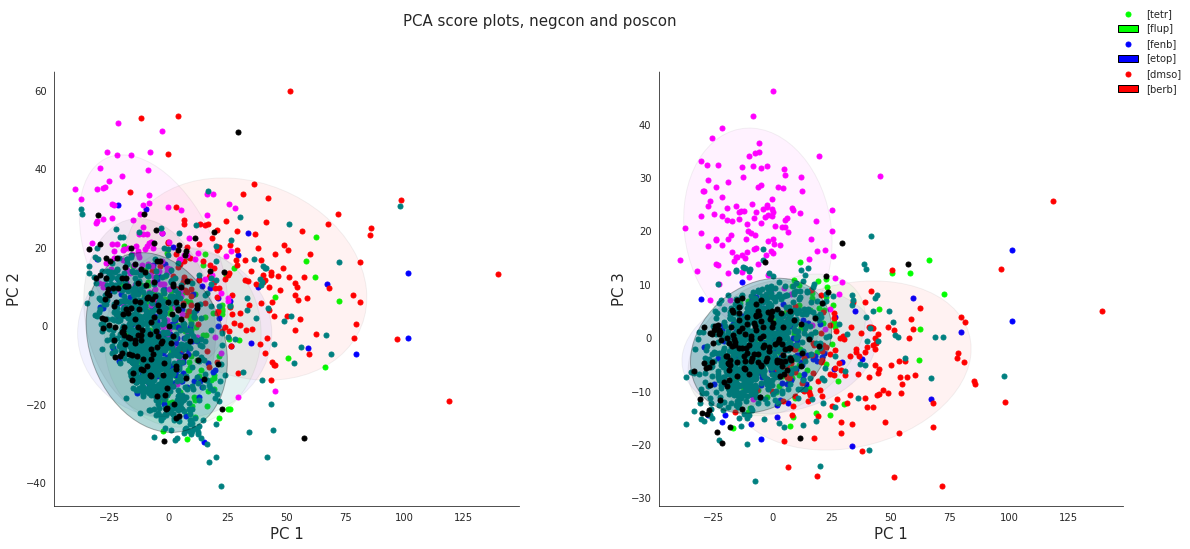

In [36]:
fig = plt.figure(figsize=(18, 8))

ax = fig.add_subplot(1, 2, 1)
ax.set_xlabel("PC 1", fontsize=15)
ax.set_ylabel("PC 2", fontsize=15)

ax1 = fig.add_subplot(1, 2, 2)
ax1.set_xlabel("PC 1", fontsize=15)
ax1.set_ylabel("PC 3", fontsize=15)


for target, color in zip(targets, colors):
    indicesToKeep = principalDf["compound"] == target
    ax.scatter(
        principalDf.loc[indicesToKeep, "principal component 1"],
        principalDf.loc[indicesToKeep, "principal component 2"],
        c=color,
        s=25,
    )
    if target == "[dmso]":
        confidence_ellipse(
            principalDf.loc[indicesToKeep, "principal component 1"],
            principalDf.loc[indicesToKeep, "principal component 2"],
            ax,
            alpha=0.3,
            facecolor=color,
            edgecolor="black",
        )
    else:
        confidence_ellipse(
            principalDf.loc[indicesToKeep, "principal component 1"],
            principalDf.loc[indicesToKeep, "principal component 2"],
            ax,
            alpha=0.05,
            facecolor=color,
            edgecolor="black",
        )
    ax1.scatter(
        principalDf.loc[indicesToKeep, "principal component 1"],
        principalDf.loc[indicesToKeep, "principal component 3"],
        c=color,
        s=25,
    )
    if target == "[dmso]":
        confidence_ellipse(
            principalDf.loc[indicesToKeep, "principal component 1"],
            principalDf.loc[indicesToKeep, "principal component 3"],
            ax1,
            alpha=0.3,
            facecolor=color,
            edgecolor="black",
        )
    else:
        confidence_ellipse(
            principalDf.loc[indicesToKeep, "principal component 1"],
            principalDf.loc[indicesToKeep, "principal component 3"],
            ax1,
            alpha=0.05,
            facecolor=color,
            edgecolor="black",
        )


leg = fig.legend(labels=targets, fontsize=10, loc="upper right", frameon=False)
for lh in leg.legendHandles:
    lh.set_alpha(1)
fig.suptitle("PCA score plots, negcon and poscon", fontsize=15)
plt.subplots_adjust(wspace=0.3, right=0.95)

ax.set_facecolor("w")
ax1.set_facecolor("w")
ax.spines["top"].set_color("white")
ax.spines["right"].set_color("white")
ax1.spines["top"].set_color("white")
ax1.spines["right"].set_color("white")

fig.savefig("{}/PCA_negcon_poscon.{}".format(OutputDir, "png"), dpi=300)
plt.show()


### UMAP

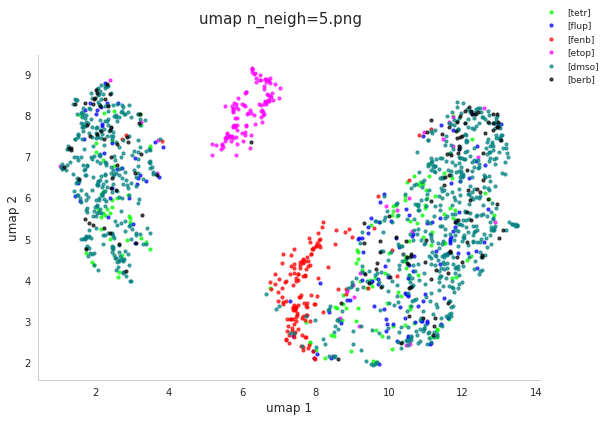

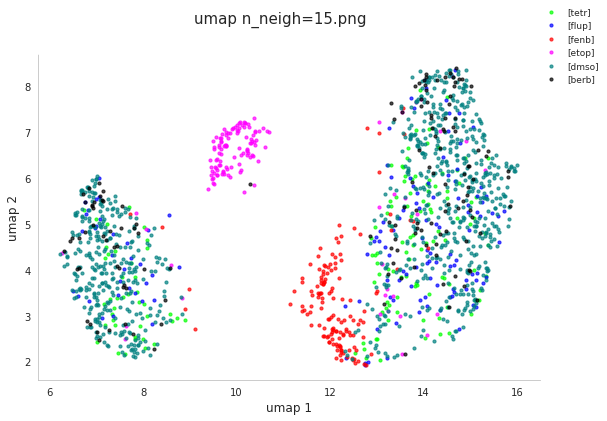

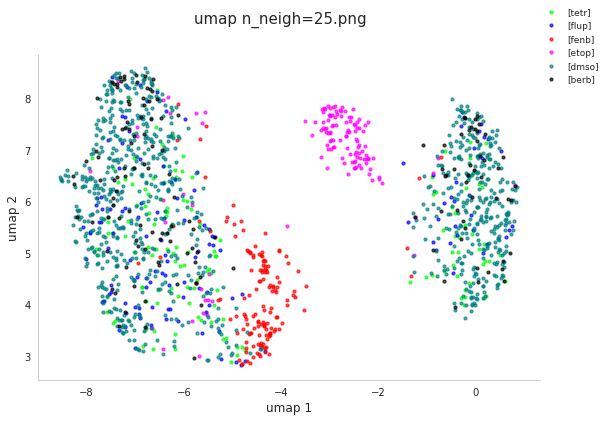

In [37]:
for n_neighbors in range(5, 30, 10):
    reducer = umap.UMAP(n_neighbors=n_neighbors)
    embedding = reducer.fit_transform(x)
    umap_result = pd.DataFrame(data=embedding, columns=["umap 1", "umap 2"])
    umap_resultDf = pd.concat(
        [
            umap_result,
            dfPart[
                [
                    "compound",
                    "conc",
                    "pert_type",
                    "ImageID",
                    "barcode",
                    "well_id",
                    "site",
                ]
            ],
        ],
        axis=1,
    )

    fig = plt.figure(figsize=(9, 6))

    ax = fig.add_subplot(1, 1, 1)
    ax.set_xlabel("umap 1", fontsize=12)
    ax.set_ylabel("umap 2", fontsize=12)

    for target, color in zip(targets, colors):
        indicesToKeep = umap_resultDf["compound"] == target
        ax.scatter(
            umap_resultDf.loc[indicesToKeep, "umap 1"],
            umap_resultDf.loc[indicesToKeep, "umap 2"],
            c=color,
            alpha=0.7,
            s=10,
        )
    # ax =sns.scatterplot(x='umap 1', y='umap 2',
    #                      hue='compound', data=umap_resultDf, palette=colors,
    #                        size='conc', sizes = (10, 50), alpha = 0.7,  marker = 'o');

    fig.legend(targets, fontsize=9, loc="upper right", frameon=False)
    fig.suptitle("umap n_neigh={}.png".format(n_neighbors), fontsize=15)
    ax.set_facecolor("w")
    ax.spines["bottom"].set_color("silver")
    ax.spines["top"].set_color("w")
    ax.spines["left"].set_color("silver")
    ax.spines["right"].set_color("w")

    fig.savefig("{}/umap_con_nneighb_{}.png".format(OutputDir, n_neighbors), dpi=150)
    plt.show()


### PCA for DMSO and single compounds

In [51]:
#CompoundList = ["BEC", "ETO", "FEN", "FLU", "OLA", "SAS", "SOR", "TET"]
CompoundList = ['5-Fluo', '5Z-7-O', 'ABT-73', 'AMG 23', 'AZD454', 'AZD776', 'AZD805', 'Abemac', 'Afatin', 'BMS-75', 'Crizot', 'Dabraf', 'Encora', 'Gefiti', 'LGK974', 'LY2603', 'Linsit',
 'MK-177', 'MK-220', 'Navito', 'Nutlin', 'Olapar', 'Oxalip', 'PD0325', 'PI-103', 'Paclit', 'Palboc', 'Ruxoli', 'SB2167', 'SB5051', 'SN-38', 'Sapiti', 'Taseli', 'Temozo', 'Tramet', 'Velipa',
 'Vinore',  'alpeli', 'binime', 'cobime', 'regora', 'tricir', 'triflu', 'vemura']


In [79]:
CompoundList.remove('Crizot')

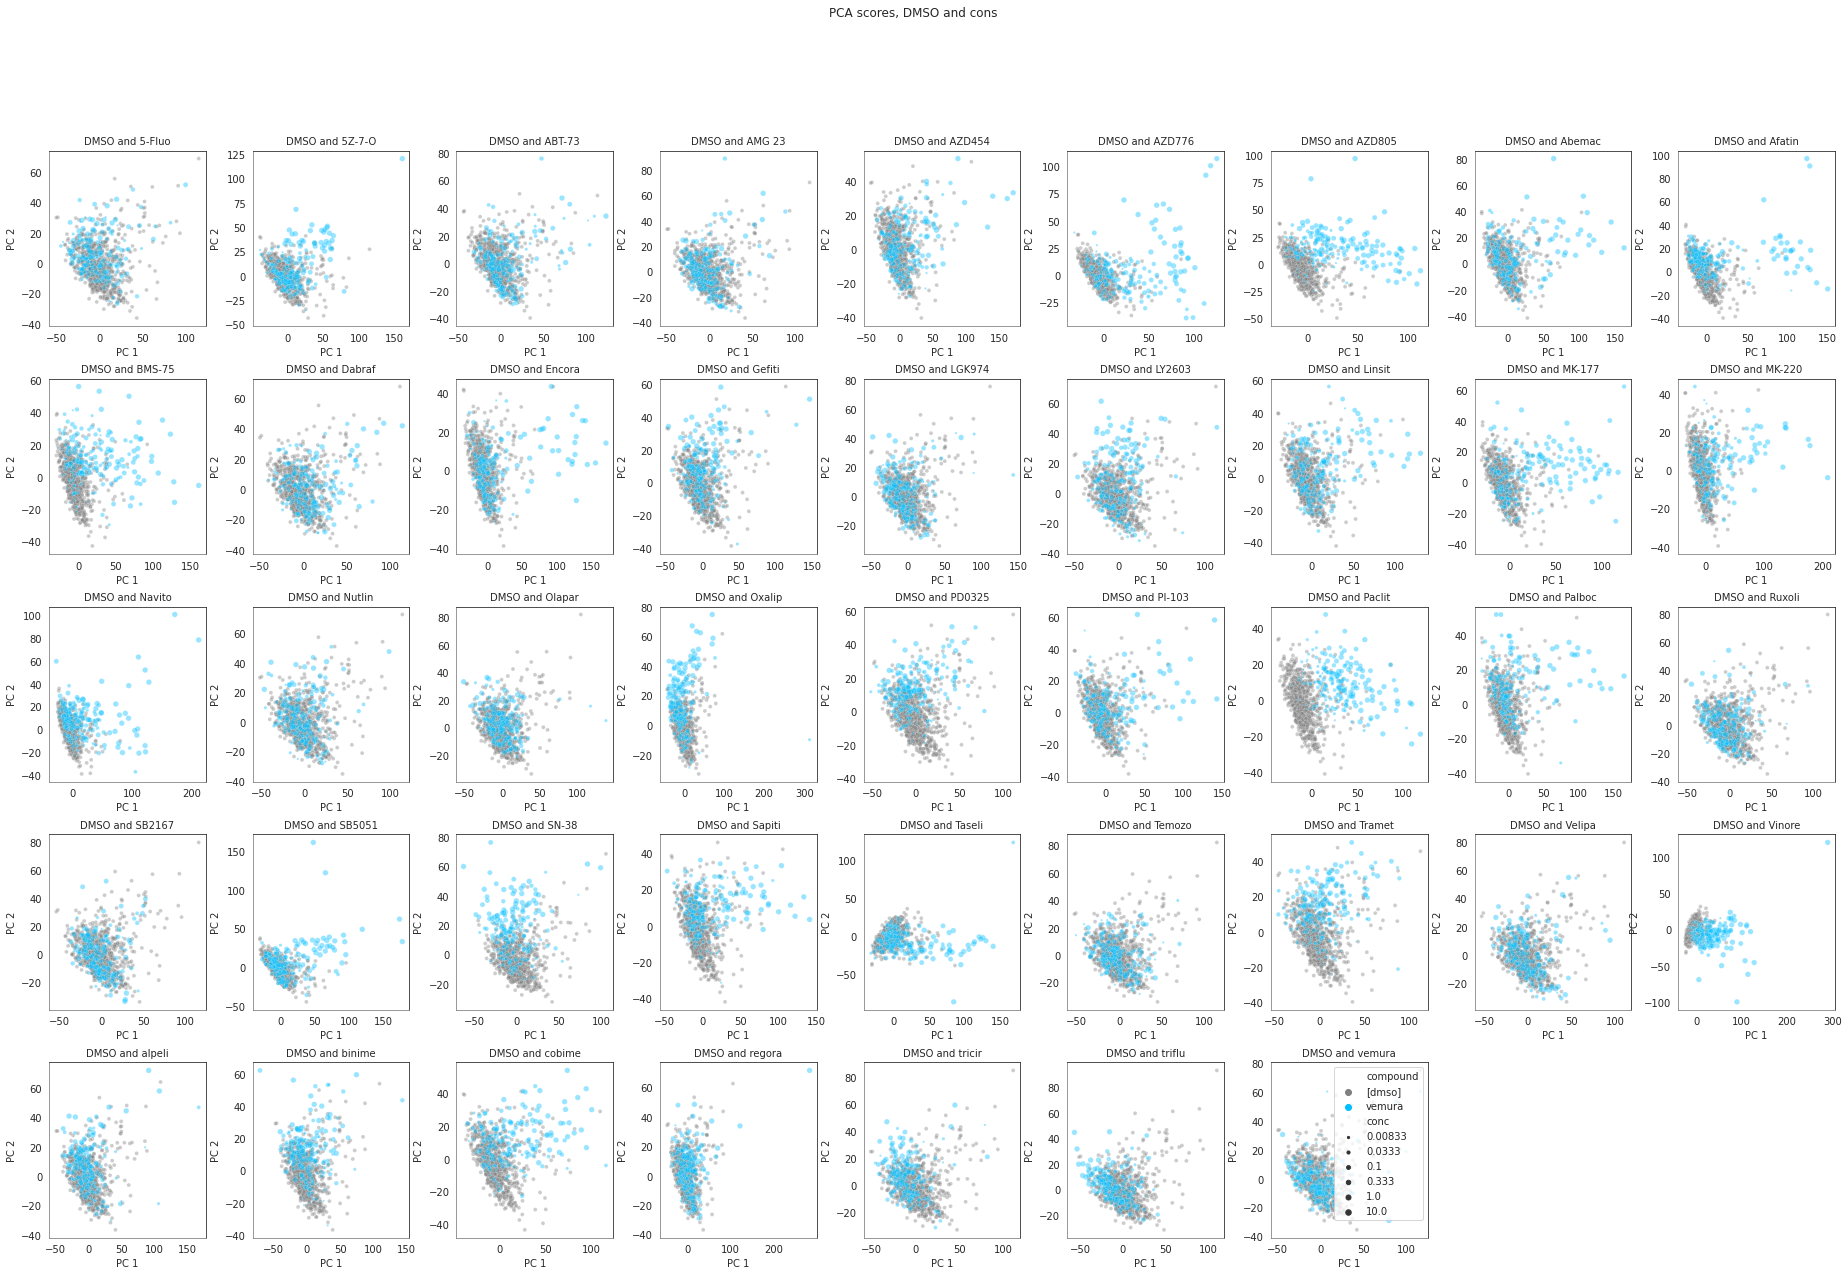

In [81]:
nrrow = 5
nrcol = 9
colors = ["gray", "deepskyblue"]

fig = plt.figure(figsize=(32, 20))
sp = 1
for comp in CompoundList:
    dfOneCompound = df.loc[
        ((df["compound"] == comp)), ["compound", "conc"] + varying_features
    ]
    dfDMSO = df.loc[
        ((df["compound"] == "[dmso]")), ["compound", "conc"] + varying_features
    ]
    frames = [dfDMSO, dfOneCompound]
    dfOneCompoundandDMSO = pd.concat(frames)
    dfOneCompoundandDMSO.reset_index(inplace=True, drop=True)

    x = dfOneCompoundandDMSO.loc[:, varying_features[:]].values
    pca = PCA(n_components=3)
    x = StandardScaler().fit_transform(x)
    principalComponents = pca.fit_transform(x)
    principalDf = pd.DataFrame(data=principalComponents)
    principalDf.rename(
        columns={
            0: "principal component 1",
            1: "principal component 2",
            2: "principal component 3",
        },
        inplace=True,
    )
    principalDf = principalDf.merge(
        dfOneCompoundandDMSO[["compound", "conc"]], left_index=True, right_index=True
    )
    # principalDf.to_csv('{}/PCA_dmso_and_{}.csv'.format(OutputDir, comp), sep=';')

    ax = fig.add_subplot(nrrow, nrcol, sp)
    ax.set_xlabel("PC 1", fontsize=10)
    ax.set_ylabel("PC 2", fontsize=10)
    ax.spines["left"].set_color("grey")
    ax.spines["bottom"].set_color("grey")
    x
    ax = sns.scatterplot(
        x="principal component 1",
        y="principal component 2",
        hue="compound",
        data=principalDf,
        palette=colors,
        size="conc",
        sizes=[5,10,15,20, 25,30],
        alpha=0.4,
        marker="o",
    )

    ax.set_title("DMSO and {}".format(comp), fontsize=10)
    ax.set_facecolor("w")
    ax.get_legend().remove()
    sp += 1
ax.legend()
plt.subplots_adjust(wspace=0.3, hspace=0.3)
fig.suptitle("PCA scores, DMSO and cons".format(), fontsize=12)
fig.savefig(
    "{}/PCA_DMSOandCons.{}".format(OutputDir, figformat), dpi=dpi, bbox_inches="tight"
)
plt.show()


### Plots for all compounds and DMSO (Christa)

* One PCA per concentration 

* Do not plot the reference compounds

In [ ]:
ConcList = sorted(list(set(df["conc"])))
ConcList.remove(2.5)

In [ ]:
df2 = df.copy()
df2['conc'].loc[(df2['compound'] == '[dmso]')] = 100
df2.loc[(df2['compound'] == '[dmso]')]

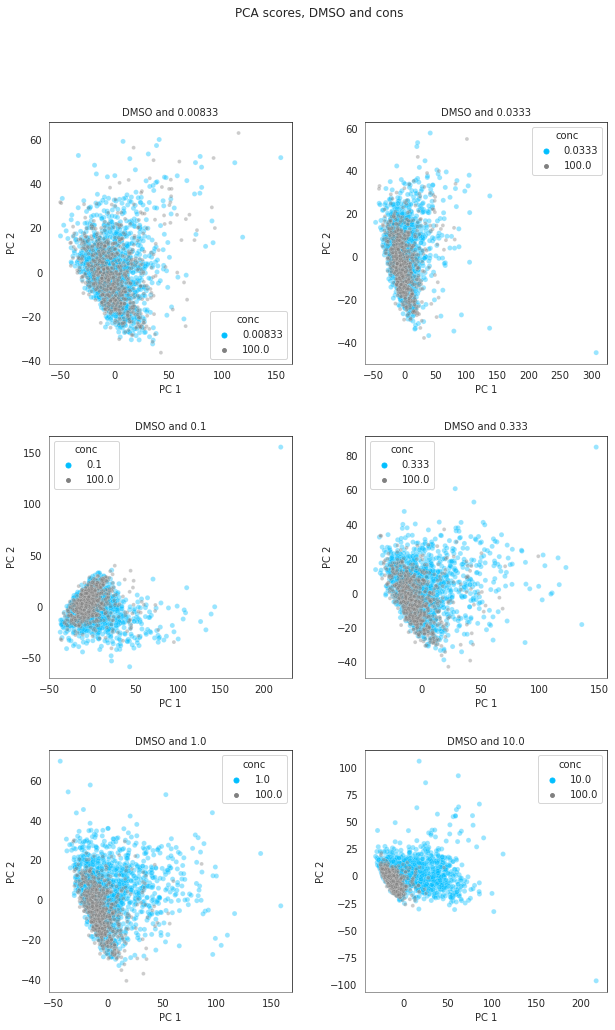

In [106]:
nrrow = 3
nrcol = 2
colors = ["deepskyblue", "gray"]

fig = plt.figure(figsize=(10, 16))
sp = 1
for conc in ConcList:
    dfOneCompound = df2.loc[
        ((df2["conc"] == conc)), ["compound", "conc"] + varying_features
    ]
    dfDMSO = df2.loc[
        ((df2["compound"] == "[dmso]")), ["compound", "conc"] + varying_features
    ]
    frames = [dfOneCompound, dfDMSO]
    dfOneCompoundandDMSO = pd.concat(frames)
    dfOneCompoundandDMSO.reset_index(inplace=True, drop=True)

    x = dfOneCompoundandDMSO.loc[:, varying_features[:]].values
    pca = PCA(n_components=3)
    x = StandardScaler().fit_transform(x)
    principalComponents = pca.fit_transform(x)
    principalDf = pd.DataFrame(data=principalComponents)
    principalDf.rename(
        columns={
            0: "principal component 1",
            1: "principal component 2",
            2: "principal component 3",
        },
        inplace=True,
    )
    principalDf = principalDf.merge(
        dfOneCompoundandDMSO[["compound", "conc"]], left_index=True, right_index=True
    )
    # principalDf.to_csv('{}/PCA_dmso_and_{}.csv'.format(OutputDir, comp), sep=';')

    ax = fig.add_subplot(nrrow, nrcol, sp)
    ax.set_xlabel("PC 1", fontsize=10)
    ax.set_ylabel("PC 2", fontsize=10)
    ax.spines["left"].set_color("grey")
    ax.spines["bottom"].set_color("grey")
    x
    ax = sns.scatterplot(
        x="principal component 1",
        y="principal component 2",
        hue="conc",
        data=principalDf,
        palette=colors,
        size="conc",
        sizes=(25, 15),
        alpha=(0.4),
        marker="o",
    )

    ax.set_title("DMSO and {}".format(conc), fontsize=10)
    ax.set_facecolor("w")
    #ax.get_legend().remove()
    sp += 1
plt.subplots_adjust(wspace=0.3, hspace=0.3)
fig.suptitle("PCA scores, DMSO and cons".format(), fontsize=12)
fig.savefig(
    "{}/PCA_DMSOandCons.{}".format(OutputDir, figformat), dpi=dpi, bbox_inches="tight"
)
plt.show()

### Nicer plots for PCA of DMSO and some compound

In [36]:
# minimal_nr_cells = 35  # consider only images with at least ... cells
# palettes = ["cool", "seismic", "plasma_r"]  # select colormap
# sizes = (15, 50)  # sizes of markers

# for comp in ["OLA", "SAS"]:  # select compound
#     for palette in palettes:
#         fig = plt.figure(figsize=(8, 8))

#         dfOneCompound = df.loc[
#             ((df["compound"] == comp)),
#             ["compound", "conc", "ImageID"] + varying_features,
#         ]
#         dfDMSO = df.loc[
#             ((df["compound"] == "[dmso]")),
#             ["compound", "conc", "ImageID"] + varying_features,
#         ]
#         dfDMSO["conc"] = 0
#         frames = [dfOneCompound, dfDMSO]
#         dfOneCompoundandDMSO = pd.concat(frames)
#         dfOneCompoundandDMSO.sort_values(by="conc", inplace=True)
#         dfOneCompoundandDMSO = dfOneCompoundandDMSO[
#             dfOneCompoundandDMSO["Count_nuclei"] > minimal_nr_cells
#         ]
#         dfOneCompoundandDMSO.reset_index(inplace=True, drop=True)
#         dfOneCompoundandDMSO["logConc"] = np.log10(dfOneCompoundandDMSO["conc"] + 1)
#         dfOneCompoundandDMSO["conc"] = dfOneCompoundandDMSO["conc"].astype(str)
#         x = dfOneCompoundandDMSO.loc[:, varying_features[:]].values
#         pca = PCA(n_components=3)
#         x = StandardScaler().fit_transform(x)
#         principalComponents = pca.fit_transform(x)
#         principalDf = pd.DataFrame(data=principalComponents)
#         principalDf.rename(
#             columns={
#                 0: "principal component 1",
#                 1: "principal component 2",
#                 2: "principal component 3",
#             },
#             inplace=True,
#         )
#         principalDf = principalDf.merge(
#             dfOneCompoundandDMSO[
#                 ["compound", "conc", "logConc", "ImageID", "Count_nuclei"]
#             ],
#             left_index=True,
#             right_index=True,
#         )
#         # principalDf.to_csv('{}/PCA_dmso_and_{}.csv'.format(OutputDir, comp), sep=';')
#         print(principalDf.shape)

#         ax = fig.add_subplot(111)
#         ax.set_xlabel("PC 1", fontsize=10)
#         ax.set_ylabel("PC 2", fontsize=10)
#         ax.spines["top"].set_color("w")
#         ax.spines["right"].set_color("w")
#         ax.spines["left"].set_color("grey")
#         ax.spines["bottom"].set_color("grey")

#         ax = sns.scatterplot(
#             x="principal component 1",
#             y="principal component 2",
#             hue="conc",
#             data=principalDf,
#             palette=palette,
#             size="logConc",
#             sizes=sizes,
#             alpha=1,
#             marker="o",
#         )

#         ax.set_facecolor("w")
#         ax.get_legend().remove()
#         leg = fig.legend(fontsize=10, loc="upper right", frameon=False)
#         plt.subplots_adjust(wspace=0, hspace=0)
#         fig.suptitle("PCA scores, DMSO and {}".format(comp), fontsize=12)
#         fig.savefig(
#             "{}/PCA_DMSOand{}_{}.{}".format(OutputDir, comp, palette, figformat),
#             dpi=dpi,
#             bbox_inches="tight",
#         )
#         plt.show()


### UMAP for DMSO and some compound

minimal_nr_cells = 35  # consider only images with at least ... cells
palette = "plasma_r"  # select colormap
sizes = (15, 50)  # sizes of markers

for comp in ["OLA", "SAS"]:  # select compound
    for n_neighbors in range(20, 45, 10):  # number of neighbors for UMAP
        fig = plt.figure(figsize=(8, 8))

        dfOneCompound = df_single.loc[
            ((df_single["compound"] == comp)),
            ["compound", "conc", "ImageID"] + varying_features,
        ]
        dfDMSO = df_single.loc[
            ((df_single["compound"] == "[dmso]")),
            ["compound", "conc", "ImageID"] + varying_features,
        ]
        dfDMSO["conc"] = 0
        frames = [dfOneCompound, dfDMSO]
        dfOneCompoundandDMSO = pd.concat(frames)
        dfOneCompoundandDMSO.sort_values(by="conc", inplace=True)
        dfOneCompoundandDMSO = dfOneCompoundandDMSO[
            dfOneCompoundandDMSO["Count_nuclei"] > minimal_nr_cells
        ]
        dfOneCompoundandDMSO.reset_index(inplace=True, drop=True)
        dfOneCompoundandDMSO["logConc"] = np.log10(dfOneCompoundandDMSO["conc"] + 1)
        dfOneCompoundandDMSO["conc"] = dfOneCompoundandDMSO["conc"].astype(str)
        x = dfOneCompoundandDMSO.loc[:, varying_features[:]].values

        reducer = umap.UMAP(n_neighbors=n_neighbors)
        embedding = reducer.fit_transform(x)
        umap_result = pd.DataFrame(data=embedding, columns=["umap 1", "umap 2"])
        umap_resultDf = pd.concat(
            [
                umap_result,
                dfOneCompoundandDMSO[
                    ["compound", "conc", "logConc", "ImageID", "Count_nuclei"]
                ],
            ],
            axis=1,
        )

        ax = fig.add_subplot(111)
        ax.set_xlabel("umap 1", fontsize=10)
        ax.set_ylabel("umap 2", fontsize=10)
        ax.spines["top"].set_color("w")
        ax.spines["right"].set_color("w")
        ax.spines["left"].set_color("grey")
        ax.spines["bottom"].set_color("grey")
        x
        ax = sns.scatterplot(
            x="umap 1",
            y="umap 2",
            hue="conc",
            data=umap_resultDf,
            palette=palette,
            size="logConc",
            sizes=sizes,
            alpha=1,
            marker="o",
        )

        ax.set_facecolor("w")
        ax.get_legend().remove()
        leg = fig.legend(fontsize=10, loc="upper right", frameon=False)
        plt.subplots_adjust(wspace=0, hspace=0)
        fig.suptitle(
            "UMAP, n_neighbors={}, DMSO and {}".format(n_neighbors, comp), fontsize=12
        )
        fig.savefig(
            "{}/UMAP_{}neighbors_DMSOand{}_{}.{}".format(
                OutputDir, n_neighbors, comp, palette, figformat
            ),
            dpi=dpi,
            bbox_inches="tight",
        )
        plt.show()


### Clustermap for DMSO, OLA and SAS

### Calculate z-scores

In [37]:
dfDMSO = df[df["compound"] == "[dmso]"]
dfDMSO_Medians = dfDMSO[varying_features].median()


In [38]:
dfDMSO_MADs = (
    (dfDMSO[varying_features] - dfDMSO[varying_features].median()).abs().median()
)
dfDMSO_MADs


AreaShape_Area_nuclei                                      188.000000
AreaShape_BoundingBoxArea_nuclei                           212.000000
AreaShape_BoundingBoxMaximum_X_nuclei                      155.000000
AreaShape_BoundingBoxMaximum_Y_nuclei                      161.500000
AreaShape_BoundingBoxMinimum_X_nuclei                      157.000000
                                                              ...    
RadialDistribution_ZernikePhase_illumSYTO_9_3_cytoplasm      0.267837
RadialDistribution_ZernikePhase_illumSYTO_9_5_cytoplasm      0.267561
RadialDistribution_ZernikePhase_illumSYTO_9_7_cytoplasm      0.278963
RadialDistribution_ZernikePhase_illumSYTO_9_9_cytoplasm      0.281422
Count_nuclei                                                41.000000
Length: 2040, dtype: float64

In [39]:
print(len(varying_features))
varying_in_DMSO = dfDMSO_MADs.loc[
    dfDMSO_MADs > 0.0001
].index  # remove features that are invariant or close to invariant in DMSO
len(varying_in_DMSO)


2040


1808

In [40]:
dfZscores = df[varying_features].copy()
dfZscores = (df[varying_features] - dfDMSO_Medians[varying_features]) / dfDMSO_MADs[
    varying_features
]
dfZscores.dropna(axis=1, inplace=True)
dfZscores = dfZscores.merge(
    df[["compound", "conc", "cmpd_conc"]],
    left_index=True,
    right_index=True,
)
dfZscores.tail(1)


,AreaShape_Area_nuclei,AreaShape_BoundingBoxArea_nuclei,AreaShape_BoundingBoxMaximum_X_nuclei,AreaShape_BoundingBoxMaximum_Y_nuclei,AreaShape_BoundingBoxMinimum_X_nuclei,AreaShape_BoundingBoxMinimum_Y_nuclei,AreaShape_Center_X_nuclei,AreaShape_Center_Y_nuclei,AreaShape_Compactness_nuclei,AreaShape_ConvexArea_nuclei,...,RadialDistribution_ZernikePhase_illumSYTO_8_8_cytoplasm,RadialDistribution_ZernikePhase_illumSYTO_9_1_cytoplasm,RadialDistribution_ZernikePhase_illumSYTO_9_3_cytoplasm,RadialDistribution_ZernikePhase_illumSYTO_9_5_cytoplasm,RadialDistribution_ZernikePhase_illumSYTO_9_7_cytoplasm,RadialDistribution_ZernikePhase_illumSYTO_9_9_cytoplasm,Count_nuclei,compound,conc,cmpd_conc
10698,-0.462766,-0.990566,-1.825806,3.547988,-1.738854,3.735849,-1.725519,3.693037,-2.113083,-0.763231,...,-0.355255,0.074211,4.648256,0.814592,0.994641,2.347612,-2.317073,Velipa,10.0,10.0


In [41]:
# dfZscores = df[varying_in_DMSO].copy()
# dfZscores = (df[varying_in_DMSO] - dfDMSO_Medians[varying_in_DMSO]) / dfDMSO_MADs[
#     varying_in_DMSO
# ]
# dfZscores.dropna(axis=1, inplace=True)
# # dfZscores = dfZscores.clip(lower=-100, upper=100) # HERE I CAN CLIP EXTREME VALUES
# dfZscores = dfZscores.merge(
#     df[["compound", "conc", "cmpd_conc", "combination", "SAS_conc", "OLA_conc"]],
#     left_index=True,
#     right_index=True,
# )
# dfZscores.tail(1)


In [42]:
# dfZscoresSingleComp = dfZscores.loc[
#     dfZscores["combination"] == "no"
# ]  # Remove combinations


In [43]:
#SomeCompounds = ["[dmso]", "OLA", "SAS"]


In [44]:
dfSomeCompounds = dfZscores[
    dfZscores["compound"].isin(CompoundList)
]


In [45]:
dfSomeCompounds.columns


Index(['AreaShape_Area_nuclei', 'AreaShape_BoundingBoxArea_nuclei',
       'AreaShape_BoundingBoxMaximum_X_nuclei',
       'AreaShape_BoundingBoxMaximum_Y_nuclei',
       'AreaShape_BoundingBoxMinimum_X_nuclei',
       'AreaShape_BoundingBoxMinimum_Y_nuclei', 'AreaShape_Center_X_nuclei',
       'AreaShape_Center_Y_nuclei', 'AreaShape_Compactness_nuclei',
       'AreaShape_ConvexArea_nuclei',
       ...
       'RadialDistribution_ZernikePhase_illumSYTO_8_8_cytoplasm',
       'RadialDistribution_ZernikePhase_illumSYTO_9_1_cytoplasm',
       'RadialDistribution_ZernikePhase_illumSYTO_9_3_cytoplasm',
       'RadialDistribution_ZernikePhase_illumSYTO_9_5_cytoplasm',
       'RadialDistribution_ZernikePhase_illumSYTO_9_7_cytoplasm',
       'RadialDistribution_ZernikePhase_illumSYTO_9_9_cytoplasm',
       'Count_nuclei', 'compound', 'conc', 'cmpd_conc'],
      dtype='object', length=1887)

In [46]:
dictOfnumeric = {i: np.nanmean for i in dfSomeCompounds.columns[2:-7]}
groupedby = dfSomeCompounds.groupby("cmpd_conc").agg(dictOfnumeric)
groupedby["compound"] = groupedby.index
groupedby["conc"] = groupedby.index
groupedby.sort_values(["compound", "conc"], inplace=True)
groupedby.drop(columns=["compound", "conc"], inplace=True)
groupedby


,AreaShape_BoundingBoxMaximum_X_nuclei,AreaShape_BoundingBoxMaximum_Y_nuclei,AreaShape_BoundingBoxMinimum_X_nuclei,AreaShape_BoundingBoxMinimum_Y_nuclei,AreaShape_Center_X_nuclei,AreaShape_Center_Y_nuclei,AreaShape_Compactness_nuclei,AreaShape_ConvexArea_nuclei,AreaShape_Eccentricity_nuclei,AreaShape_EquivalentDiameter_nuclei,...,RadialDistribution_ZernikePhase_illumSYTO_7_1_cytoplasm,RadialDistribution_ZernikePhase_illumSYTO_7_3_cytoplasm,RadialDistribution_ZernikePhase_illumSYTO_7_5_cytoplasm,RadialDistribution_ZernikePhase_illumSYTO_7_7_cytoplasm,RadialDistribution_ZernikePhase_illumSYTO_8_2_cytoplasm,RadialDistribution_ZernikePhase_illumSYTO_8_4_cytoplasm,RadialDistribution_ZernikePhase_illumSYTO_8_6_cytoplasm,RadialDistribution_ZernikePhase_illumSYTO_8_8_cytoplasm,RadialDistribution_ZernikePhase_illumSYTO_9_1_cytoplasm,RadialDistribution_ZernikePhase_illumSYTO_9_3_cytoplasm
cmpd_conc,,,,,,,,,,,,,,,,,,,,,
0.00833,-0.113181,-0.073899,-0.104926,-0.071349,-0.111199,-0.077104,0.238087,-0.012549,-0.035656,-0.080639,...,0.029156,0.008612,-0.100648,0.055610,0.057412,-0.101437,-0.110850,-0.058977,-0.058067,-0.098973
0.03330,-0.069351,-0.007507,-0.060326,-0.002264,-0.067461,-0.009013,0.211684,-0.042469,-0.111622,-0.116709,...,0.025790,-0.203147,-0.054491,0.069324,0.060477,-0.053193,-0.153919,-0.056857,-0.112866,0.030398
0.10000,-0.150652,0.032813,-0.139783,0.039334,-0.146883,0.031447,0.134856,-0.036918,-0.209562,-0.117464,...,-0.030518,-0.135217,-0.117807,0.040851,-0.013486,-0.032073,-0.155939,-0.029247,-0.112496,-0.012765
0.33300,-0.098578,-0.024492,-0.087854,-0.017258,-0.095781,-0.025071,0.329164,-0.157881,-0.031186,-0.254558,...,-0.031592,-0.072271,-0.157140,0.026678,0.092542,-0.062510,-0.121488,-0.075958,-0.013500,-0.000461
1.00000,-0.042840,-0.021756,-0.029115,-0.013312,-0.039228,-0.022893,0.627154,-0.208804,-0.095665,-0.354192,...,-0.061532,-0.109741,-0.130885,0.091608,-0.019174,-0.048403,-0.219737,-0.083906,0.006701,0.113479
2.50000,-0.124333,-0.014755,-0.116173,-0.015497,-0.121492,-0.019954,0.885253,0.037580,-0.051516,-0.228501,...,0.023479,0.014754,-0.048764,-0.043813,0.007241,-0.015621,-0.323793,0.041678,-0.119849,-0.036647
10.00000,-0.168047,-0.034145,-0.153386,-0.022226,-0.162435,-0.032818,1.612659,-0.318663,-0.222495,-0.550094,...,-0.155508,-0.084190,-0.085875,0.021980,-0.077665,-0.001735,-0.179897,-0.056452,-0.082432,-0.065339


nr_rows = groupedby.shape[0]

x = groupedby.values
x = StandardScaler().fit_transform(x)
x = pd.DataFrame(x, index=groupedby.index)
x = x - x.loc["[dmso]_0.2"]

sns.set(font_scale=0.6)
sns_plot = sns.clustermap(
    x,
    method="ward",
    metric="euclidean",
    z_score=None,
    standard_scale=None,
    cbar_kws=None,
    figsize=(12, nr_rows / 4 + 1),
    row_cluster=False,
    col_cluster=True,
    cbar_pos=(0.02, 0.8, 0.05, 0.18),
    row_linkage=None,
    col_linkage=None,
    row_colors=None,
    vmin=-3,
    vmax=3,
    col_colors=None,
    cmap="RdBu_r",
    xticklabels=False,
)
plt.suptitle("clustermap, features, {}".format(SomeCompounds), fontsize=12, y=1.05)
sns_plot.savefig("{}/clustermap_OLA_SAS_c.{}".format(OutputDir, figformat), dpi=dpi)
plt.show()


nr_rows = groupedby.shape[0]

x = groupedby.values
x = StandardScaler().fit_transform(x)
x = pd.DataFrame(x, index=groupedby.index)
x = x - x.loc["[dmso]_0.2"]

sns.set(font_scale=0.6)
sns_plot = sns.clustermap(
    x,
    method="ward",
    metric="euclidean",
    z_score=None,
    standard_scale=None,
    cbar_kws=None,
    figsize=(12, nr_rows / 4 + 1),
    row_cluster=True,
    col_cluster=True,
    cbar_pos=(0.02, 0.8, 0.05, 0.18),
    row_linkage=None,
    col_linkage=None,
    row_colors=None,
    vmin=-3,
    vmax=3,
    col_colors=None,
    cmap="RdBu_r",
    xticklabels=False,
)
plt.suptitle(
    "clustermap, features and compounds, {}".format(SomeCompounds), fontsize=12, y=1.05
)
sns_plot.savefig("{}/clustermap_OLA_SAS_rc.{}".format(OutputDir, figformat), dpi=dpi)
plt.show()


### Grit

In [47]:
dataset = dfZscores.copy()
dataset["CompRepl"] = (
    dataset["compound"] + "_" + dataset.index.astype(str)
)  # dataset.concentration.astype(str)#
datasetPart = dataset
datasetPart.iloc[:, :-10] = datasetPart.iloc[:, :-10].clip(lower=-100, upper=100)
datasetPart.head(1)


,AreaShape_Area_nuclei,AreaShape_BoundingBoxArea_nuclei,AreaShape_BoundingBoxMaximum_X_nuclei,AreaShape_BoundingBoxMaximum_Y_nuclei,AreaShape_BoundingBoxMinimum_X_nuclei,AreaShape_BoundingBoxMinimum_Y_nuclei,AreaShape_Center_X_nuclei,AreaShape_Center_Y_nuclei,AreaShape_Compactness_nuclei,AreaShape_ConvexArea_nuclei,...,RadialDistribution_ZernikePhase_illumSYTO_9_1_cytoplasm,RadialDistribution_ZernikePhase_illumSYTO_9_3_cytoplasm,RadialDistribution_ZernikePhase_illumSYTO_9_5_cytoplasm,RadialDistribution_ZernikePhase_illumSYTO_9_7_cytoplasm,RadialDistribution_ZernikePhase_illumSYTO_9_9_cytoplasm,Count_nuclei,compound,conc,cmpd_conc,CompRepl
0,-1.553191,-2.193396,-0.409677,-1.891641,-0.328025,-1.833333,-0.382345,-1.875941,0.209958,-1.779944,...,-0.426551,2.501806,-0.123854,0.196738,1.536471,-1.902439,[tetr],2.5,2.5,[tetr]_0


In [48]:
features = list(datasetPart.columns[2:-7])
meta_features = list(datasetPart.columns[-7:])

meta_features


['RadialDistribution_ZernikePhase_illumSYTO_9_7_cytoplasm',
 'RadialDistribution_ZernikePhase_illumSYTO_9_9_cytoplasm',
 'Count_nuclei',
 'compound',
 'conc',
 'cmpd_conc',
 'CompRepl']

In [49]:
control_perts = datasetPart.query("compound == '[dmso]'").CompRepl.unique().tolist()


In [50]:
grit_replicate_groups = {"profile_col": "CompRepl", "replicate_group_col": "cmpd_conc"}


In [51]:
grit_scores = []

# for cell_line in datasetPart.plate.unique():
#    cell_line_df = datasetPart.query("plate == @cell_line")

grit_results = evaluate(
    profiles=datasetPart,
    features=features,
    meta_features=meta_features,
    replicate_groups=grit_replicate_groups,
    operation="grit",
    similarity_metric="pearson",
    grit_replicate_summary_method="median",
    grit_control_perts=control_perts,
)  # .assign(cell_line=cell_line)

grit_scores.append(grit_results)


In [ ]:
grit_scores = pd.concat(grit_scores).reset_index(drop=True)
print(grit_scores.shape)
grit_scores.head()


In [ ]:
grit_scores["perturbation"]

In [ ]:
grit_scores["compound"] = grit_scores["perturbation"].str.split("_").str[0]
grit_scores["conc"] = grit_scores["group"]
grit_scores.tail()


In [ ]:
grit_scores.to_csv("{}/grit_scores.csv".format(OutputDir), sep=";")


In [ ]:
grit_scores_grouped = grit_scores.groupby("group").mean()
grit_scores_grouped["compound"] = grit_scores_grouped.index.str.split("_").str[0]
grit_scores_grouped["conc"] = (
    grit_scores_grouped.index.str.split("_").str[1].astype(float)
)
grit_scores_grouped.to_csv("{}/grit_scores_grouped.csv".format(OutputDir), sep=";")
grit_scores_grouped.head(8)


In [ ]:
CompoundsUsed = sorted(list(set(grit_scores["compound"])))
print(CompoundsUsed)


CompoundsUsed = [
    "BEC",
    "ETO",
    "FEN",
    "FLU",
    "OLA",
    "SAS",
    "SOR",
    "TET",
    "[dmso]",
]  # removed 'SASfiltered'


In [ ]:
fig = plt.figure(figsize=(48, 32))
sns.set(font_scale=1.5)
fig.suptitle("grit barplot", fontsize=24, x=0.3)
sp = 1
nrrow = 10
nrcol = 5
for some in CompoundsUsed[:]:
    grit_scores_part = grit_scores[grit_scores["compound"] == some].copy()
    grit_scores_part.sort_values(by="conc", inplace=True)
    ax = fig.add_subplot(nrrow, nrcol, sp)
    ax = sns.barplot(
        x="conc",
        y="grit",
        data=grit_scores_part,
        palette="Blues_d",
        alpha=1,
        errcolor="black",
        errwidth=3,
    )
    ax.set_facecolor("w")
    ax.spines["bottom"].set_color("grey")
    ax.spines["left"].set_color("grey")
    ax.set_ylim([-0.1, 3])
    ax.set_title("{}".format(some), fontsize=24, x=0.2)
    plt.subplots_adjust(top=0.9, wspace=0.2, hspace=0.5, left=0.0)
    sp += 1
fig.savefig(
    "{}/grit_barplots.{}".format(OutputDir, "png"), dpi=150, bbox_inches="tight"
)
fig.savefig(
    "{}/grit_barplots.{}".format(OutputDir, "pdf"), dpi=300, bbox_inches="tight"
)
plt.show()


    stop here

### Plot dose-repsonse curves

100%_viability = dfDMSO_Median.CountNuclei

for some in CompoundUsed
    df.some.[coumpound]
    viability = viability_compound at dose / 100%_viability * 100


In [86]:
def rand_jitter(arr,comp_conc):
    stdev = .01 * ((max(arr) - min(arr))+comp_conc*3)
    return arr + np.random.randn(len(arr)) * stdev

In [212]:
CompoundList = sorted(list(set(df["compound"])))  # remove 'SASfiltered'
CompoundList.remove('[dmso]')
CompoundList.remove('Crizot')

In [135]:
CompoundList = ['5-Fluo']

In [ ]:
## An empty canvas for trying
CompoundList

ValueError: The number of FixedLocator locations (7), usually from a call to set_ticks, does not match the number of ticklabels (2).

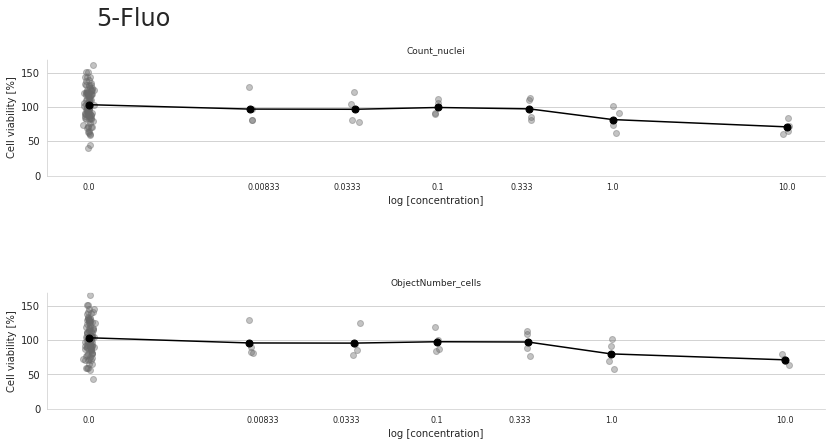

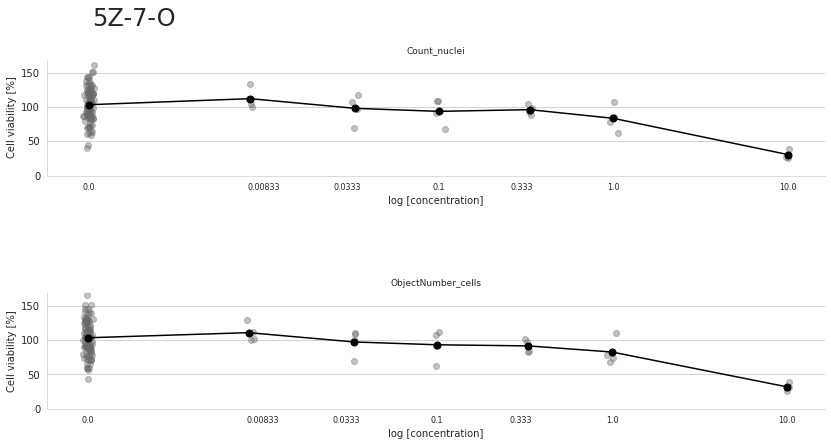

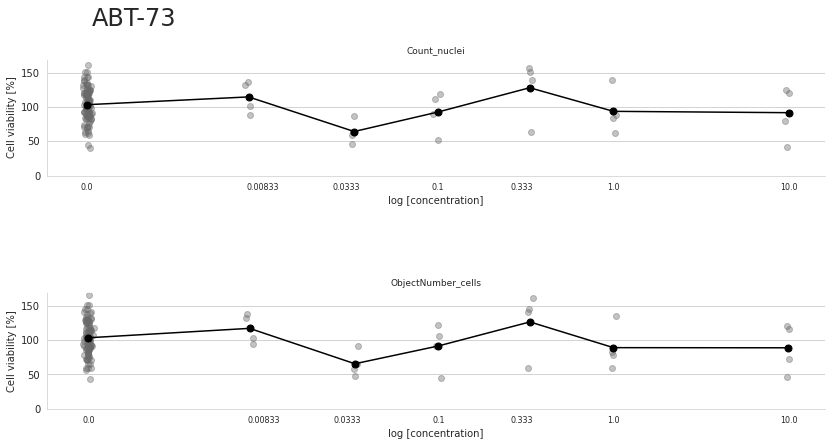

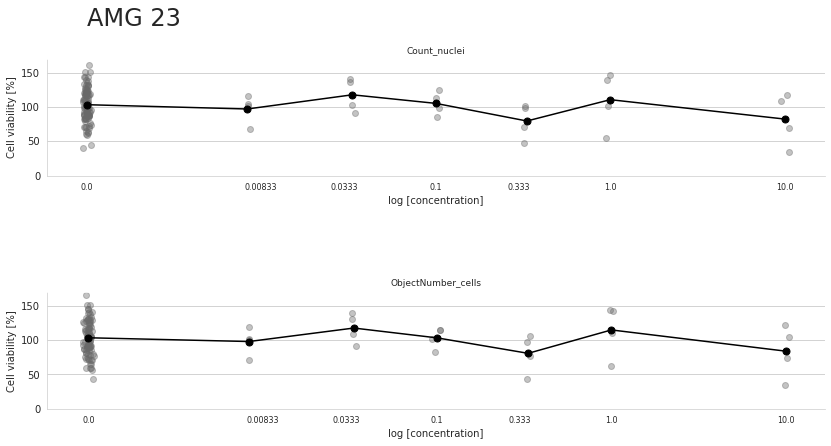

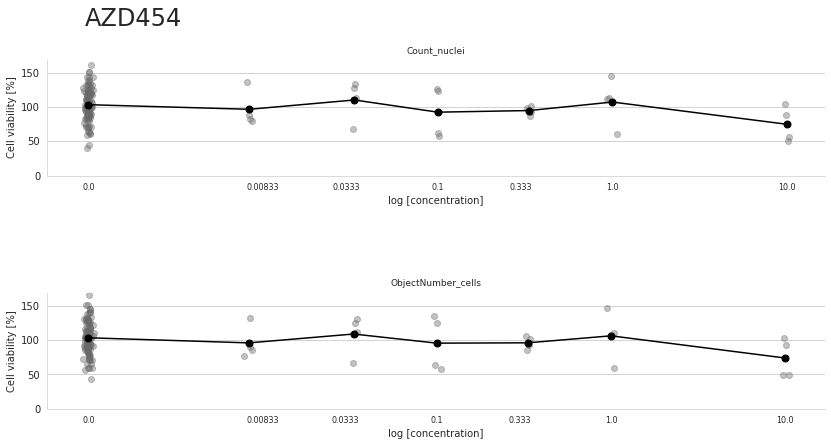

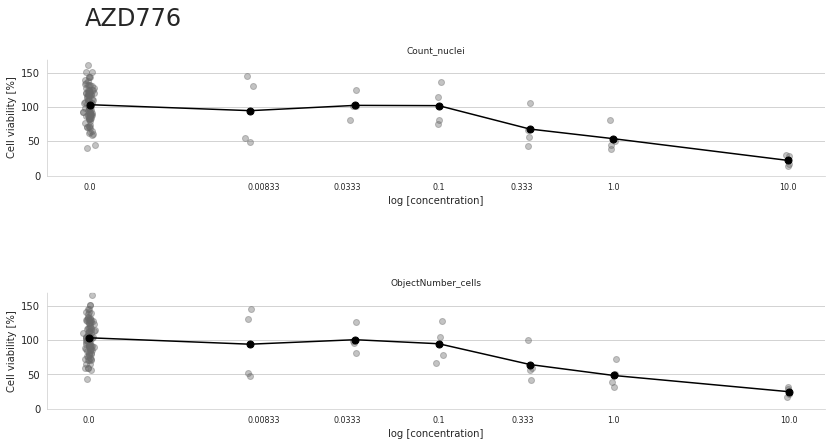

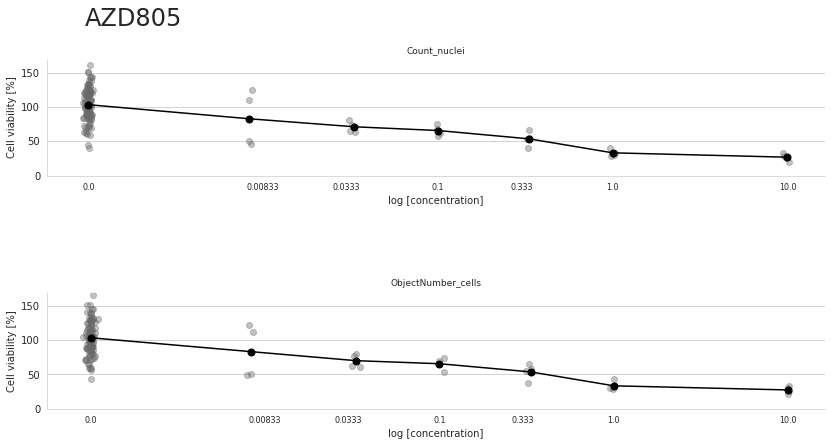

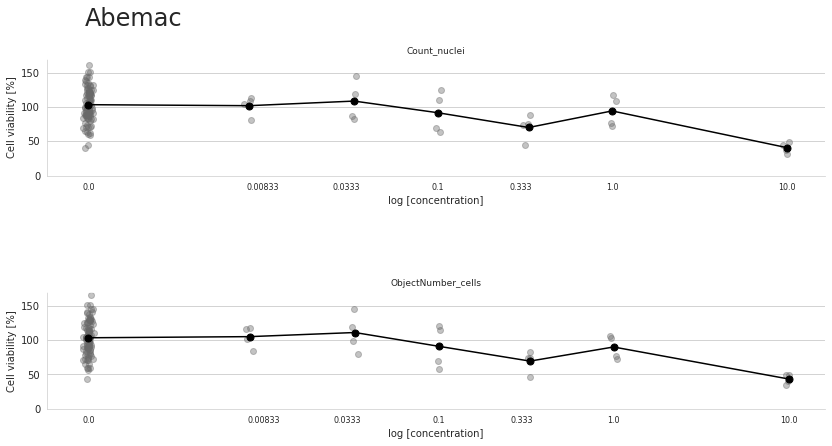

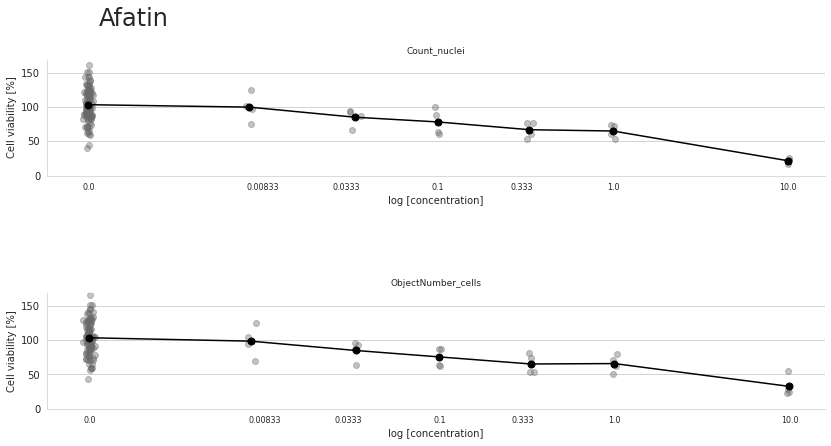

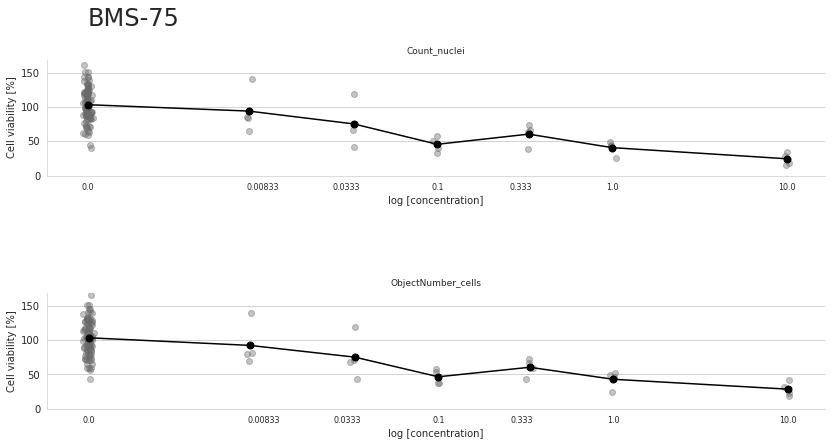

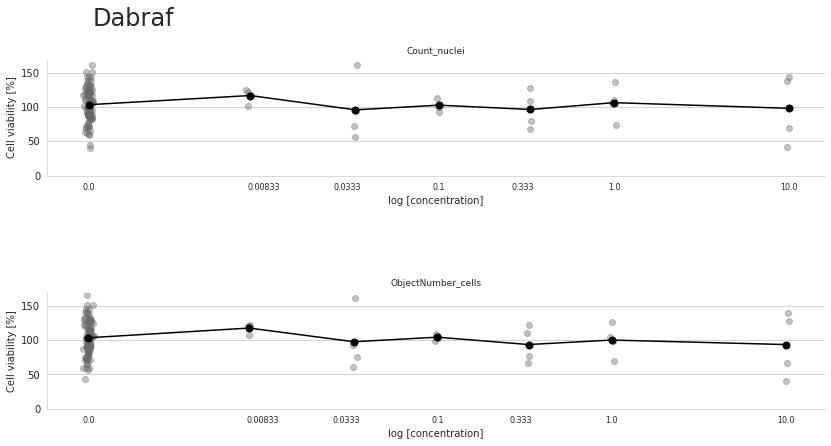

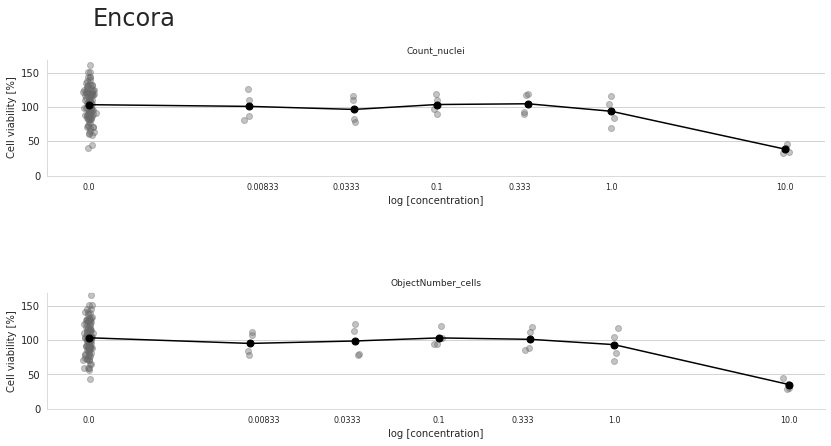

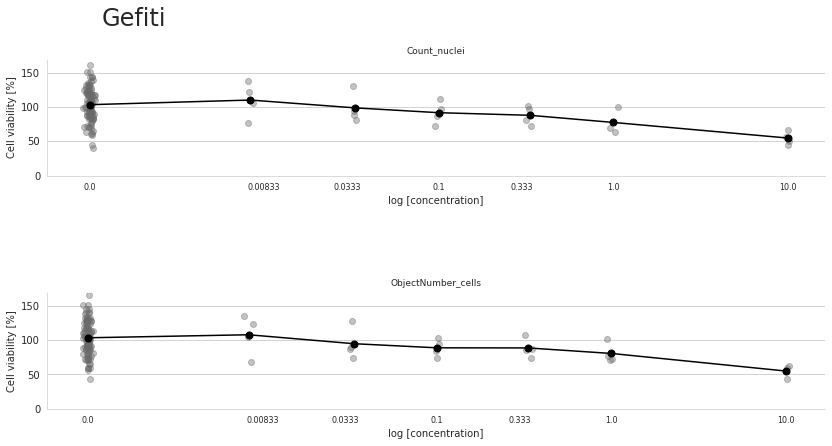

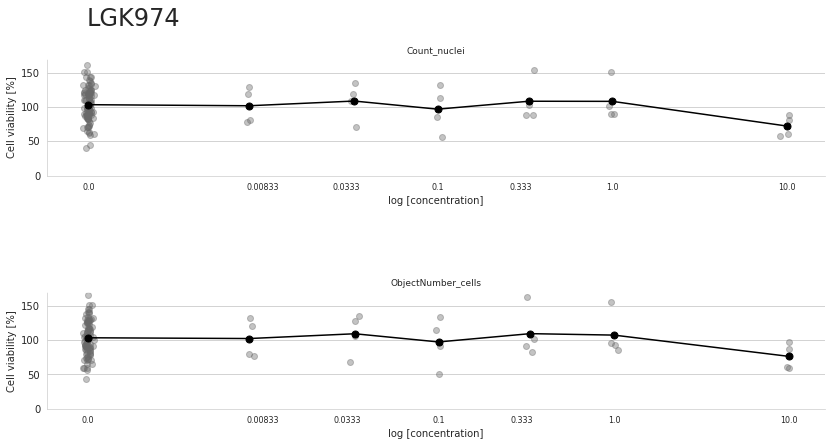

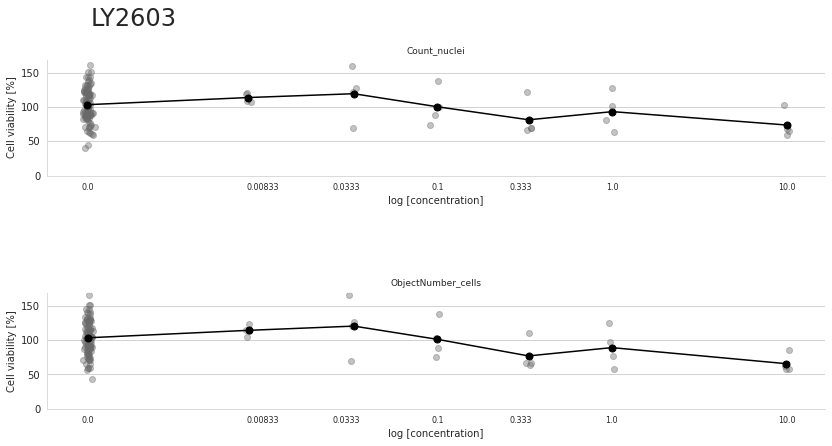

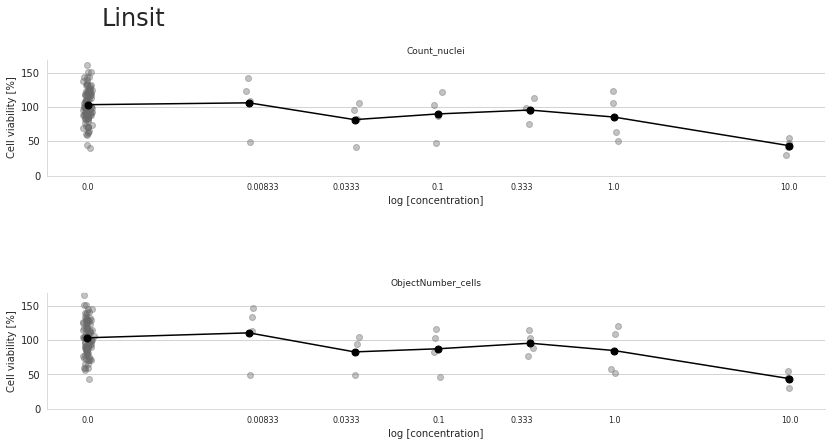

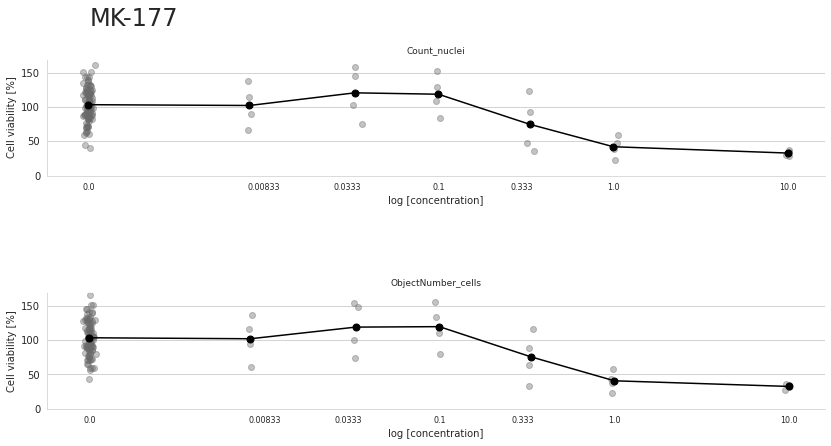

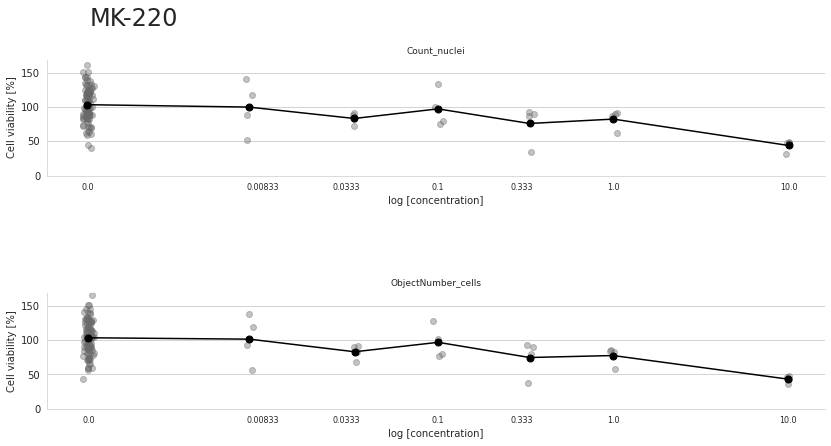

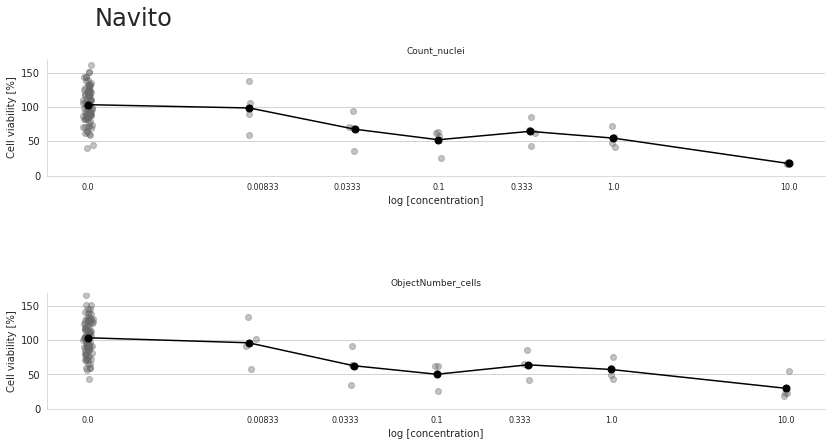

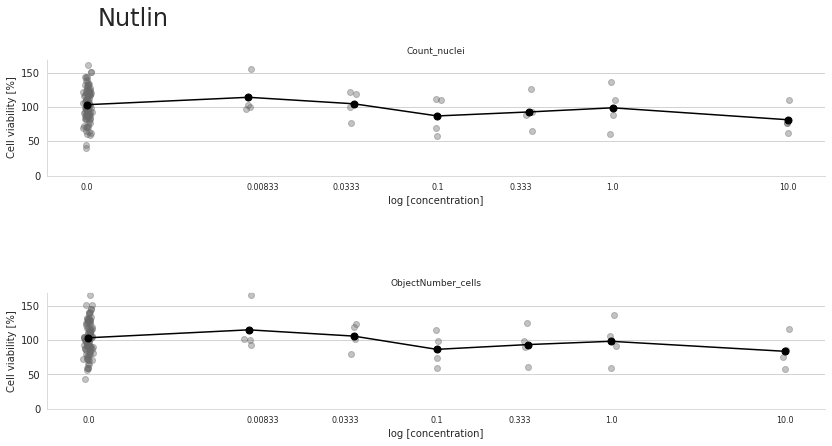

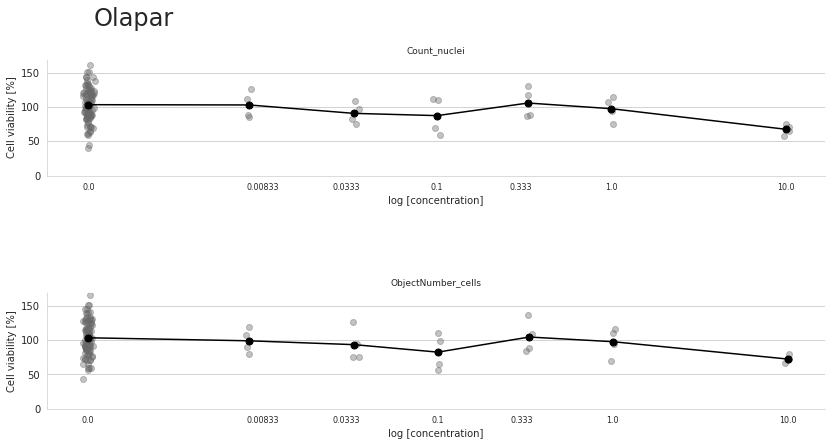

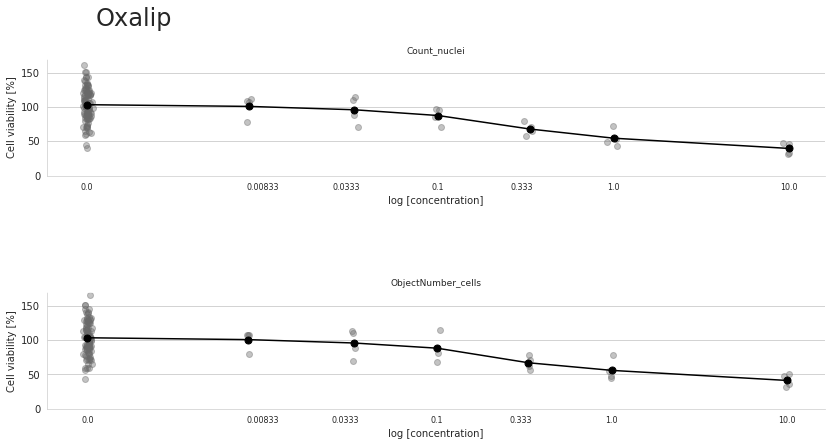

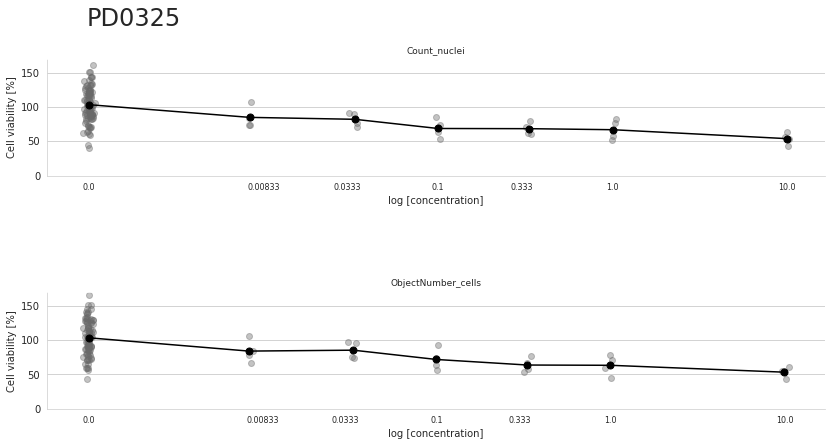

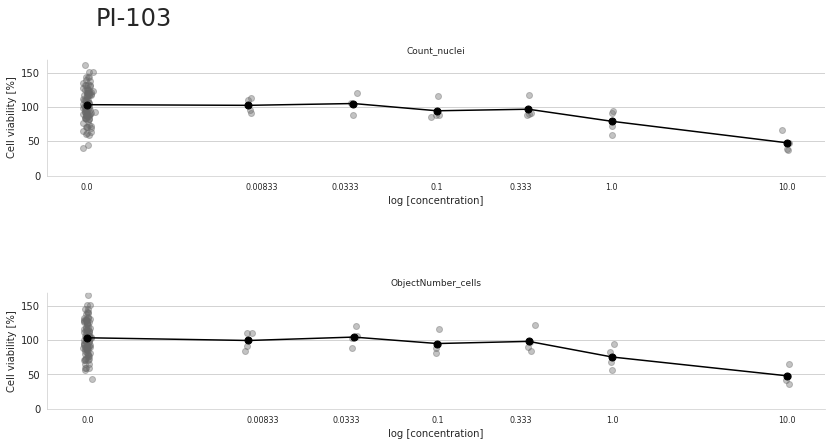

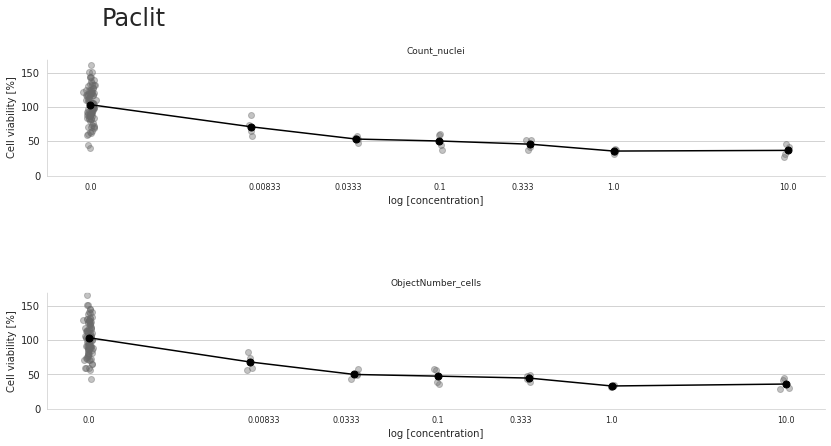

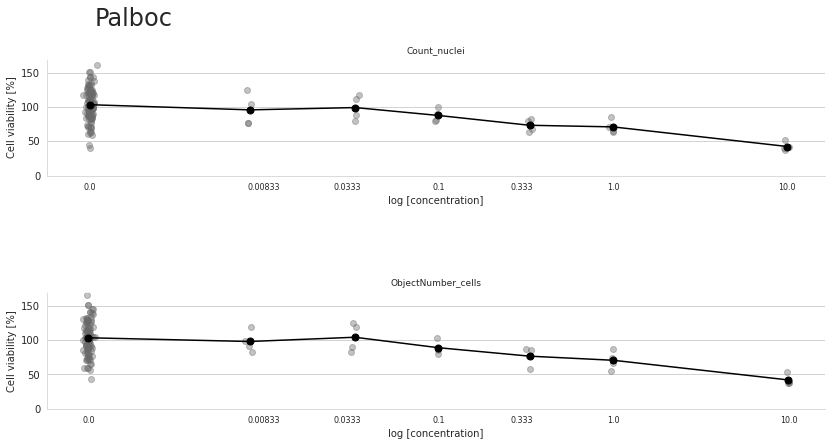

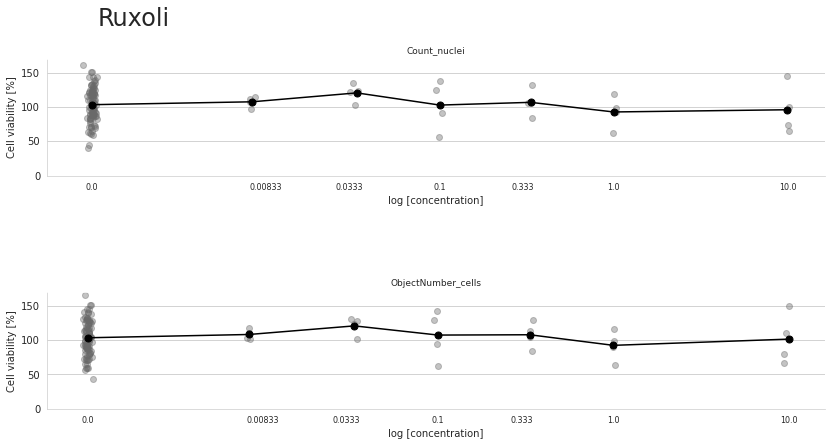

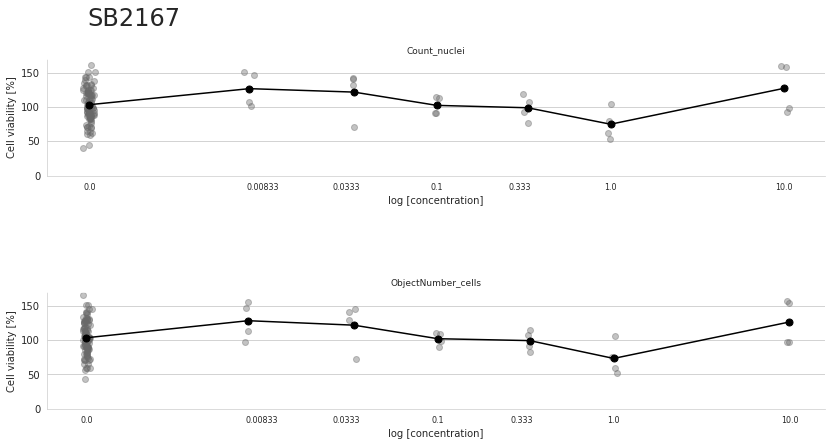

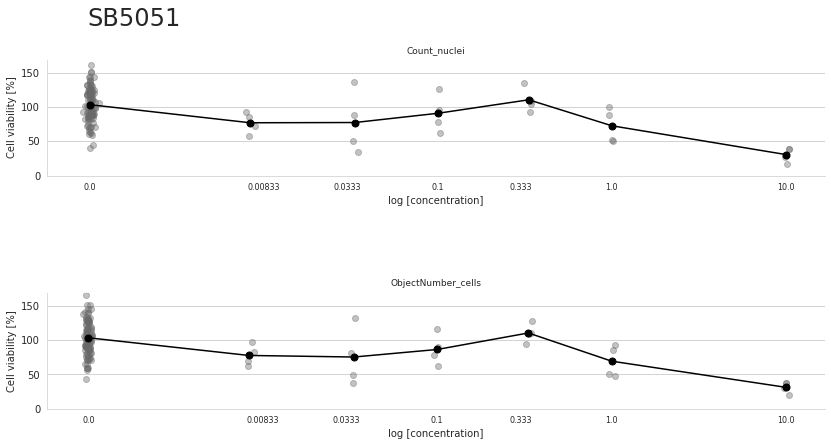

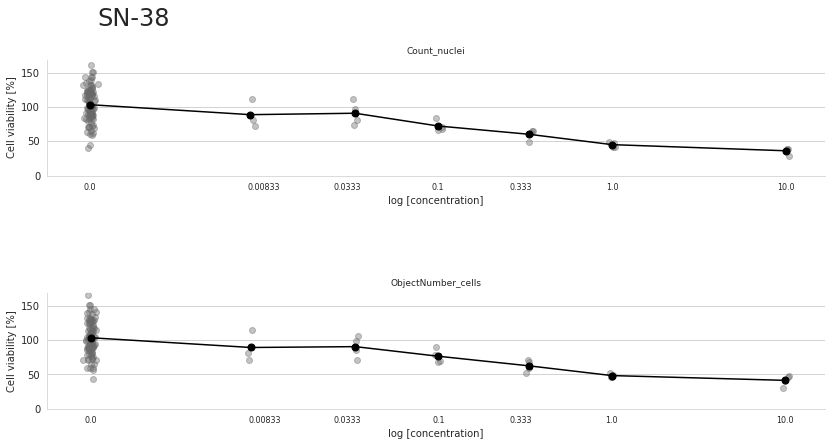

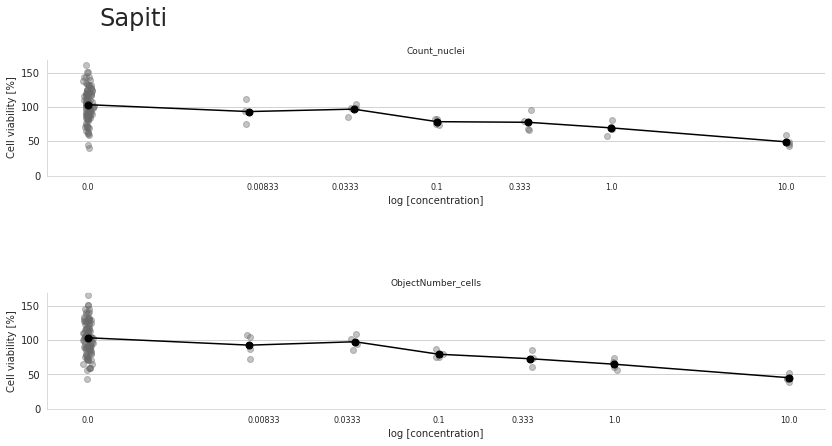

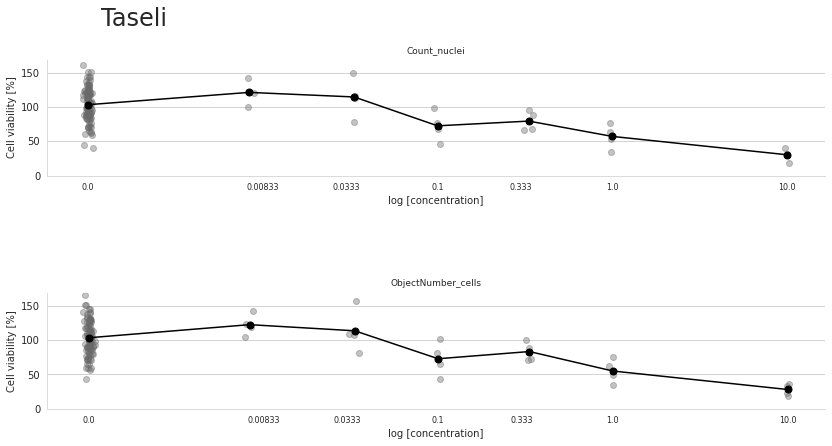

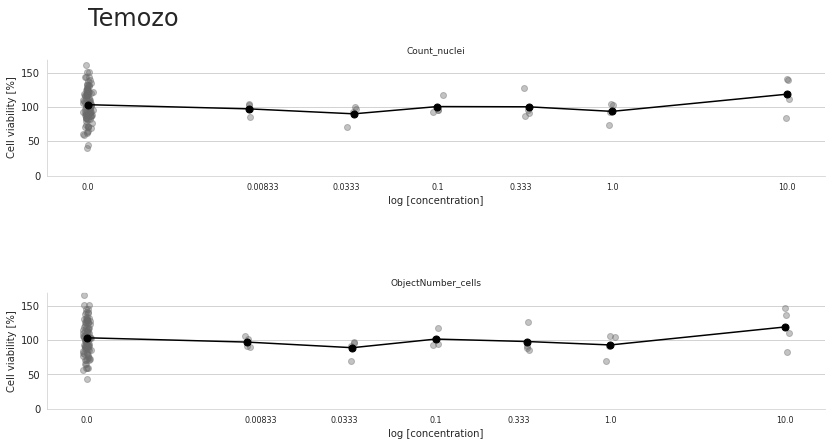

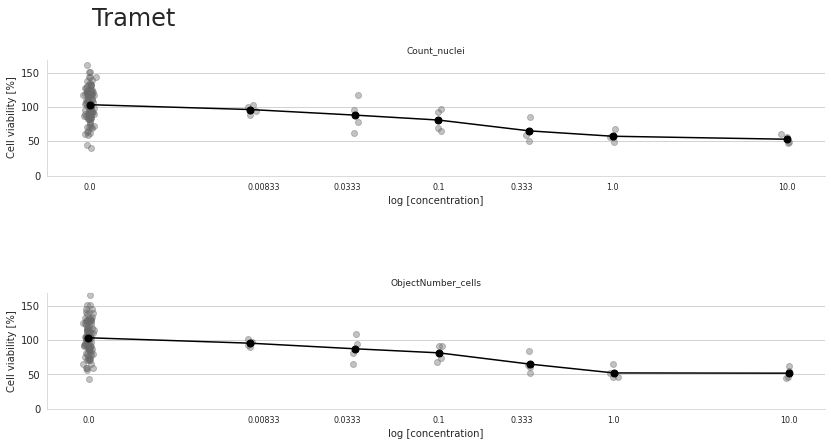

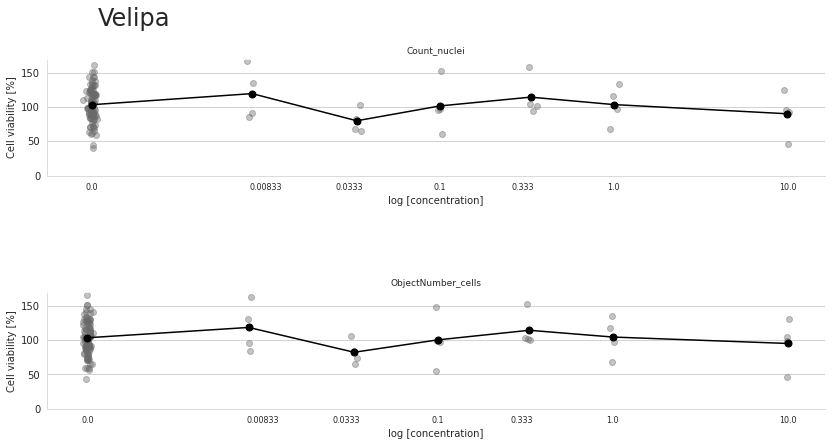

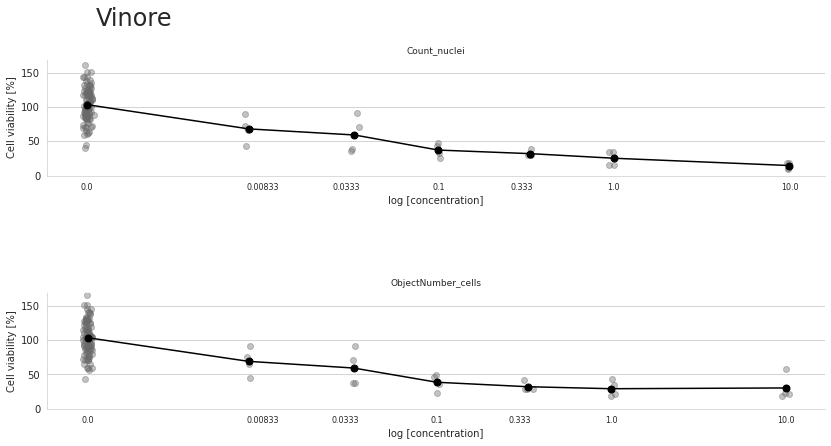

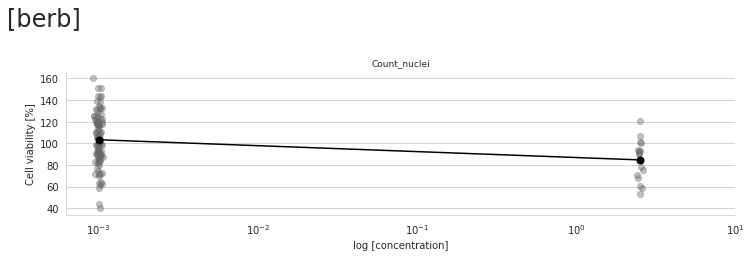

In [213]:
## Todo: 1) take the mean per well, 2) plot the line plot, 3) calculate the IC50s

FeatureList = ['Count_nuclei','ObjectNumber_cells']
colorList = ['lightcoral', 'tomato', 'indianred', 'firebrick', 'brown', 'maroon']
    
for comp in (CompoundList[:]):
    dfOneCompound = df.loc[(df['compound'] == comp), ['compound','conc', 'plateWell']+ FeatureList]
    dfDMSO = df.loc[(df['compound'] == '[dmso]'), ['compound','conc', 'plateWell']+ FeatureList]
    dfDMSO['conc'] = 0.001
                
    frames = [dfDMSO, dfOneCompound]

    dfOneCompoundandDMSO = pd.concat(frames, sort=False)
    dfOneCompoundandDMSO.sort_values(by = ['conc'], inplace = True)
    dfOneCompoundViabilty = dfOneCompoundandDMSO.copy()
    dfOneCompoundViabilty[FeatureList] = (dfOneCompoundandDMSO[FeatureList] / dfDMSO[FeatureList].median()) * 100 # Calculate the viability 
    CompConcList = sorted(list(dict.fromkeys(list(dfOneCompoundandDMSO['conc']))))
    Legend = CompConcList

    dfMeanperWell = dfOneCompoundViabilty.groupby(['plateWell','compound', 'conc'])[FeatureList].mean().reset_index() # take the mean values per well
    dfForLinePlot = dfMeanperWell.groupby(['conc'])[FeatureList].mean().reset_index()
        
    fig = plt.figure(figsize = (12,9))
    fig.suptitle('{}'.format(comp), fontsize = 24, x=0.1)
    sp = 1
    for index, feature in enumerate(FeatureList):
        #colors = ['dimgray'] + [colorList[index]]*(len(CompConcList)-1)
        colors = ['dimgray'] + colorList
        ax = fig.add_subplot(3, math.ceil(len(FeatureList)/3),sp) 
        concentrations_thiscompound = []
        for comp_conc in  CompConcList:
            concentrations_thiscompound = dfMeanperWell.loc[(dfMeanperWell['conc'] == comp_conc)][feature].values
            concentrations_thiscompound = np.array(concentrations_thiscompound, dtype=object)
            x_values = np.tile(comp_conc,len(concentrations_thiscompound))
            plt.scatter(rand_jitter(x_values,comp_conc), concentrations_thiscompound, c=['dimgray'],alpha=0.4)
        ax.set_title(feature, fontsize = 9, loc = 'center')
        plt.plot(dfForLinePlot['conc'],dfForLinePlot[feature],'ko-', markersize=7)
        

        ax.set_facecolor('w')
        ax.spines['bottom'].set_color('lightgrey')
        ax.spines['top'].set_color('w')
        ax.spines['left'].set_color('lightgrey')
        ax.spines['right'].set_color('w')
        ax.grid(visible=True, which='major', axis='y', color='lightgrey', linewidth=1)
        #if sp == 3:
        #    ax.set_ylim([0, None])
        sp = sp + 1
        #plt.grid(axis = 'y')
        #for patch, color in zip(bplot['boxes'], colors):
        #    patch.set_facecolor(color)
        ax.set_xscale('log')
        ax.set_ylabel('Cell viability [%]')
        ax.set_xlabel('log [concentration]')
        ax.set_xticks([0.001, 0.01,0.03,0.1, 0.3, 1.0, 10])
        ax.set_xticklabels(labels=['0.0'] + Legend[1:], rotation = 0, fontsize=8)
        ax.set_ylim([0, 170])

    plt.subplots_adjust(top=0.90,  wspace=0,  hspace=1, bottom=0.0, left =0.0)
    fig.savefig('{}/{}.{}'.format(OutputDir, comp, 'png'),  dpi=150, bbox_inches='tight')

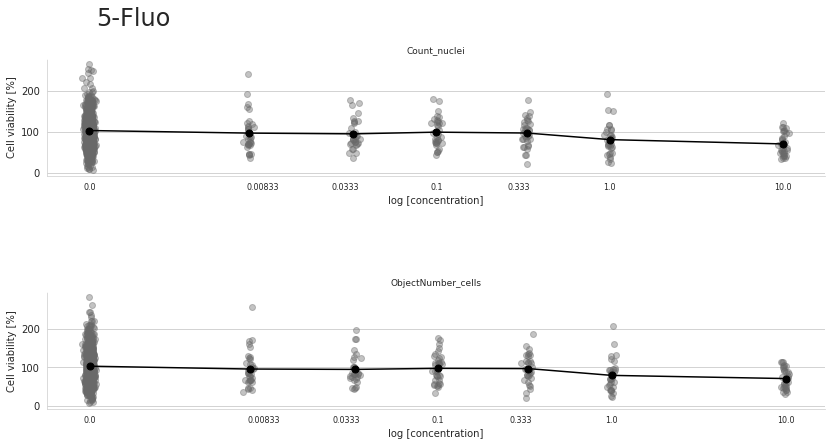

In [207]:
## This one is kind of working, but I am still unhappy with it.

FeatureList = ['Count_nuclei','ObjectNumber_cells']
colorList = ['lightcoral', 'tomato', 'indianred', 'firebrick', 'brown', 'maroon']
    
for comp in (CompoundList[:]):
    dfOneCompound = df.loc[(df['compound'] == comp), ['compound','conc']+ FeatureList]
    dfDMSO = df.loc[(df['compound'] == '[dmso]'), ['compound','conc']+ FeatureList]
    dfDMSO['conc'] = 0.001
                
    frames = [dfDMSO, dfOneCompound]

    dfOneCompoundandDMSO = pd.concat(frames, sort=False)
    dfOneCompoundandDMSO.sort_values(by = ['conc'], inplace = True)
    dfOneCompoundViabilty = dfOneCompoundandDMSO.copy()
    dfOneCompoundViabilty[FeatureList] = (dfOneCompoundandDMSO[FeatureList] / dfDMSO[FeatureList].median()) * 100 # Calculate the viability 
    CompConcList = sorted(list(dict.fromkeys(list(dfOneCompoundandDMSO['conc']))))
    Legend = CompConcList

    dfForLinePlot = dfOneCompoundViabilty.groupby(['conc'])[FeatureList].mean().reset_index()
        
    fig = plt.figure(figsize = (12,9))
    fig.suptitle('{}'.format(comp), fontsize = 24, x=0.1)
    sp = 1
    for index, feature in enumerate(FeatureList):
        #colors = ['dimgray'] + [colorList[index]]*(len(CompConcList)-1)
        colors = ['dimgray'] + colorList
        ax = fig.add_subplot(3, math.ceil(len(FeatureList)/3),sp) 
        concentrations_thiscompound = []
        for comp_conc in  CompConcList:
            concentrations_thiscompound = dfOneCompoundViabilty.loc[(dfOneCompoundViabilty['conc'] == comp_conc)][feature].values
            concentrations_thiscompound = np.array(concentrations_thiscompound, dtype=object)
            x_values = np.tile(comp_conc,len(concentrations_thiscompound))
            plt.scatter(rand_jitter(x_values,comp_conc), concentrations_thiscompound, c=['dimgray'],alpha=0.4)
            #plt.plot(concentrations_thiscompound.mean(),CompConcList[sp])
        ax.set_title(feature, fontsize = 9, loc = 'center')
        #bplot = ax.boxplot(concentrations_thiscompound, patch_artist=True, flierprops = None, showfliers=False)
        plt.plot(dfForLinePlot['conc'],dfForLinePlot[feature],'ko-', markersize=7)

        ax.set_facecolor('w')
        ax.spines['bottom'].set_color('lightgrey')
        ax.spines['top'].set_color('w')
        ax.spines['left'].set_color('lightgrey')
        ax.spines['right'].set_color('w')
        ax.grid(visible=True, which='major', axis='y', color='lightgrey', linewidth=1)
        #if sp == 3:
        #    ax.set_ylim([0, None])
        sp = sp + 1
        #plt.grid(axis = 'y')
        #for patch, color in zip(bplot['boxes'], colors):
        #    patch.set_facecolor(color)
        ax.set_xscale('log')
        ax.set_ylabel('Cell viability [%]')
        ax.set_xlabel('log [concentration]')
        ax.set_xticks([0.001, 0.01,0.03,0.1, 0.3, 1.0, 10])
        ax.set_xticklabels(labels=['0.0'] + Legend[1:], rotation = 0, fontsize=8)

    plt.subplots_adjust(top=0.90,  wspace=0,  hspace=1, bottom=0.0, left =0.0)
    fig.savefig('{}/{}.{}'.format(OutputDir, comp, 'png'),  dpi=150, bbox_inches='tight')

### Combinations of fixed dose of SAS with different doses of olaparib

In [ ]:
df_comb = df[(df["compound"] == "SAS") | (df["compound"] == "[dmso]")]
df_comb.reset_index(drop=True, inplace=True)
df_comb.shape


In [ ]:
print(sorted(list(set(df_comb["cmpd_conc"]))))


In [ ]:
ConcOfFirstAgent = ["200", "400"]

FeatureList = ["AreaShape_Area_cytoplasm", "AreaShape_Area_nuclei", "Count_nuclei"]
colorList = ["orangered", "magenta", "teal"]

for conc in ConcOfFirstAgent:
    CompoundList = ["SAS"]
    for comp in CompoundList:
        dfOneConc = df_comb.loc[
            (df_comb["cmpd_conc"].str.contains(conc)), ["conc", "conc2"] + FeatureList
        ]
        dfOneConc["conc2"] = dfOneConc["conc2"].fillna(0)
        dfDMSO = df_comb.loc[
            (df_comb["compound"] == "[dmso]"), ["conc", "conc2"] + FeatureList
        ]
        dfDMSO["conc"] = -99
        dfDMSO["conc2"] = -99
        frames = [dfDMSO, dfOneConc]
        dfTwoCompoundsandDMSO = pd.concat(frames, sort=False)
        dfTwoCompoundsandDMSO.sort_values(by=["conc2"], inplace=True)
        CompConcList = sorted(list(dict.fromkeys(list(dfTwoCompoundsandDMSO["conc2"]))))
        Legend = CompConcList.copy()
        Legend[0] = "DMSO"

        fig = plt.figure(figsize=(6, 3))
        fig.suptitle("{} {} + olaparib".format(comp, conc), fontsize=12, x=0.1)
        sp = 1
        for index, feature in enumerate(FeatureList):
            colors = ["lime"] + [colorList[index]] * (len(CompConcList) - 1)
            ax = fig.add_subplot(3, math.ceil(len(FeatureList) / 3), sp)
            concentrations_thiscompound = []
            for comp_conc in CompConcList:
                concentrations_thiscompound.append(
                    dfTwoCompoundsandDMSO.loc[
                        (dfTwoCompoundsandDMSO["conc2"] == comp_conc)
                    ][feature].values
                )
            concentrations_thiscompound = np.array(
                concentrations_thiscompound, dtype=object
            )
            ax.set_title(feature, fontsize=9, loc="center")
            bplot = ax.boxplot(
                concentrations_thiscompound,
                patch_artist=True,
                flierprops=None,
                showfliers=False,
            )
            ax.set_xticklabels(labels=Legend, rotation=0, Fontsize=8)

            ax.set_facecolor("w")
            ax.spines["bottom"].set_color("lightgrey")
            ax.spines["top"].set_color("w")
            ax.spines["left"].set_color("lightgrey")
            ax.spines["right"].set_color("w")
            ax.grid(
                visible=True, which="major", axis="y", color="lightgrey", linewidth=1
            )
            if sp == 3:
                ax.set_ylim([0, None])
            sp = sp + 1
            # plt.grid(axis = 'y')
            for patch, color in zip(bplot["boxes"], colors):
                patch.set_facecolor(color)
        plt.subplots_adjust(top=0.90, wspace=0, hspace=1, bottom=0.0, left=0.0)
        fig.savefig(
            "{}/combinations_{}_{}.{}".format(OutputDir, comp, conc, "png"),
            dpi=150,
            bbox_inches="tight",
        )


### Combinations of fixed dose of OLA with different doses of sulfasalazine

In [ ]:
df_comb2 = df[
    (df["cmpd_conc"].str.contains("OLA")) | (df["compound"] == "[dmso]")
].copy()

df_comb2["conc2"] = np.where(
    df_comb2["compound"] == "OLA", df_comb2["conc"], df_comb2["conc2"]
)
df_comb2["conc"] = np.where(df_comb2["compound"] == "OLA", 0, df_comb2["conc"])
df_comb2.reset_index(drop=True, inplace=True)
df_comb2.head(2)


In [ ]:
print(sorted(list(set(df_comb2["cmpd_conc"]))))


In [ ]:
ConcOfSecondAgent = ["5", "10"]

FeatureList = ["AreaShape_Area_cytoplasm", "AreaShape_Area_nuclei", "Count_nuclei"]
colorList = ["orangered", "magenta", "teal"]

for conc in ConcOfSecondAgent:
    CompoundList = ["OLA"]
    for comp in CompoundList:
        dfOneConc = df_comb2.loc[
            (df_comb2["cmpd_conc"].str.endswith(conc)), ["conc", "conc2"] + FeatureList
        ]
        # dfOneConc['conc2'] = dfOneConc['conc2'].fillna(dfOneConc['conc'])
        dfDMSO = df_comb2.loc[
            (df_comb2["compound"] == "[dmso]"), ["conc", "conc2"] + FeatureList
        ]
        dfDMSO["conc"] = -99
        dfDMSO["conc2"] = -99
        frames = [dfDMSO, dfOneConc]
        dfTwoCompoundsandDMSO = pd.concat(frames, sort=False)
        dfTwoCompoundsandDMSO.sort_values(by=["conc"], inplace=True)
        CompConcList = sorted(list(dict.fromkeys(list(dfTwoCompoundsandDMSO["conc"]))))
        Legend = CompConcList.copy()
        Legend[0] = "DMSO"

        fig = plt.figure(figsize=(6, 3))
        fig.suptitle("{} {} + sulfasalazine".format(comp, conc), fontsize=12, x=0.1)
        sp = 1
        for index, feature in enumerate(FeatureList):
            colors = ["lime"] + [colorList[index]] * (len(CompConcList) - 1)
            ax = fig.add_subplot(3, math.ceil(len(FeatureList) / 3), sp)
            concentrations_thiscompound = []
            for comp_conc in CompConcList:
                concentrations_thiscompound.append(
                    dfTwoCompoundsandDMSO.loc[
                        (dfTwoCompoundsandDMSO["conc"] == comp_conc)
                    ][feature].values
                )
            concentrations_thiscompound = np.array(
                concentrations_thiscompound, dtype=object
            )
            ax.set_title(feature, fontsize=9, loc="center")
            bplot = ax.boxplot(
                concentrations_thiscompound,
                patch_artist=True,
                flierprops=None,
                showfliers=False,
            )
            ax.set_xticklabels(labels=Legend, rotation=0, Fontsize=8)

            ax.set_facecolor("w")
            ax.spines["bottom"].set_color("lightgrey")
            ax.spines["top"].set_color("w")
            ax.spines["left"].set_color("lightgrey")
            ax.spines["right"].set_color("w")
            ax.grid(
                visible=True, which="major", axis="y", color="lightgrey", linewidth=1
            )
            if sp == 3:
                ax.set_ylim([0, None])
            sp = sp + 1
            # plt.grid(axis = 'y')
            for patch, color in zip(bplot["boxes"], colors):
                patch.set_facecolor(color)
        plt.subplots_adjust(top=0.90, wspace=0, hspace=1, bottom=0.0, left=0.0)
        fig.savefig(
            "{}/combinations_{}_{}.{}".format(OutputDir, comp, conc, "png"),
            dpi=150,
            bbox_inches="tight",
        )


In [ ]:
sas_ola_Zscores = dfZscores[
    (dfZscores["compound"] == "SAS")
    | (dfZscores["compound"] == "OLA")
    | (dfZscores["compound"] == "[dmso]")
]
sas_ola_Zscores.reset_index(drop=True, inplace=True)
sas_ola_Zscores.head(1)


In [ ]:
print(sorted(list(set(sas_ola_Zscores["cmpd_conc"]))))


In [ ]:
dataset = sas_ola_Zscores.copy()
dataset["CompRepl"] = (
    dataset["cmpd_conc"] + "_" + dataset.index.astype(str)
)  # dataset.concentration.astype(str)#
datasetPart = dataset
datasetPart.iloc[:, :-10] = datasetPart.iloc[:, :-10].clip(lower=-100, upper=100)
datasetPart.head(1)


In [ ]:
features = list(datasetPart.columns[2:-5])
meta_features = list(datasetPart.columns[-5:])
meta_features


In [ ]:
control_perts = datasetPart.query("compound == '[dmso]'").CompRepl.unique().tolist()


In [ ]:
grit_replicate_groups = {"profile_col": "CompRepl", "replicate_group_col": "cmpd_conc"}


In [ ]:
grit_scores = []

# for cell_line in datasetPart.plate.unique():
#    cell_line_df = datasetPart.query("plate == @cell_line")

grit_results = evaluate(
    profiles=datasetPart,
    features=features,
    meta_features=meta_features,
    replicate_groups=grit_replicate_groups,
    operation="grit",
    similarity_metric="pearson",
    grit_replicate_summary_method="median",
    grit_control_perts=control_perts,
)  # .assign(cell_line=cell_line)

grit_scores.append(grit_results)


In [ ]:
grit_scores = pd.concat(grit_scores).reset_index(drop=True)
print(grit_scores.shape)
grit_scores.head()


In [ ]:
grit_scores_grouped = grit_scores.groupby("group").mean()
# grit_scores_grouped['compound'] = grit_scores_grouped.index.str.split('_').str[0]
# grit_scores_grouped['conc'] = grit_scores_grouped.index.str.split('_').str[1].astype(float)
# grit_scores_grouped.to_csv('{}/grit_scores_grouped.csv'.format(OutputDir), sep=';')
grit_scores_grouped.head(8)


In [ ]:
fixed = ["SAS_200", "SAS_400"]

fig = plt.figure(figsize=(12, 4))
fig.suptitle("grit barplot, {}".format(fixed), fontsize=15, x=0.3)
sp = 1
nrrow = 1
nrcol = 2
sns.set(font_scale=1)

for f in fixed:

    fixed_conc = float(f.split("_")[-1])
    grit_scores_grouped_SAS = grit_scores[grit_scores.group.str.contains(f)].copy()
    grit_scores_grouped_SAS["conc"] = (
        grit_scores_grouped_SAS.group.str.split("_").str[-1].astype(float)
    )
    grit_scores_grouped_SAS["conc"] = np.where(
        grit_scores_grouped_SAS["conc"] == fixed_conc,
        0,
        grit_scores_grouped_SAS["conc"],
    )
    grit_scores_grouped_SAS.sort_values("conc", inplace=True)
    grit_scores_grouped_SAS.reset_index(inplace=True)
    ax = fig.add_subplot(nrrow, nrcol, sp)
    ax = sns.barplot(
        x="group",
        y="grit",
        data=grit_scores_grouped_SAS,
        palette="Blues_d",
        alpha=1,
        errcolor="black",
        errwidth=3,
    )
    ax.set_facecolor("w")
    ax.spines["bottom"].set_color("grey")
    ax.spines["left"].set_color("grey")
    ax.set_ylim([-0.1, 5])

    for tick in ax.xaxis.get_major_ticks():
        tick.label.set_fontsize(9)
        tick.label.set_rotation(70)
    sp += 1
    # ax.set_title('{}'.format(some), fontsize = 12, x=0.2)
plt.subplots_adjust(top=0.9, wspace=0.2, hspace=0.5, left=0.0)

fig.savefig(
    "{}/grit_barplot_{}.{}".format(OutputDir, fixed, "png"),
    dpi=150,
    bbox_inches="tight",
)
# fig.savefig('{}/grit_barplots.{}'.format(OutputDir, 'pdf'),  dpi=300, bbox_inches='tight')
plt.show()


In [ ]:
fixed = ["OLA_5", "OLA_10"]

fig = plt.figure(figsize=(12, 4))
fig.suptitle("grit barplot, {}".format(fixed), fontsize=15, x=0.3)
sp = 1
nrrow = 1
nrcol = 2
sns.set(font_scale=1)

for f in fixed:

    fixed_conc = float(f.split("_")[-1])
    grit_scores_grouped_OLA = grit_scores[grit_scores.group.str.contains(f)].copy()
    grit_scores_grouped_OLA["conc"] = (
        grit_scores_grouped_OLA.group.str.split("_").str[1].astype(float)
    )
    grit_scores_grouped_OLA["conc"] = np.where(
        grit_scores_grouped_OLA["conc"] == fixed_conc,
        0,
        grit_scores_grouped_OLA["conc"],
    )
    grit_scores_grouped_OLA.sort_values("conc", inplace=True)
    grit_scores_grouped_OLA.reset_index(inplace=True)
    ax = fig.add_subplot(nrrow, nrcol, sp)
    ax = sns.barplot(
        x="group",
        y="grit",
        data=grit_scores_grouped_OLA,
        palette="Blues_d",
        alpha=1,
        errcolor="black",
        errwidth=3,
    )
    ax.set_facecolor("w")
    ax.spines["bottom"].set_color("grey")
    ax.spines["left"].set_color("grey")
    ax.set_ylim([-0.1, 5])

    for tick in ax.xaxis.get_major_ticks():
        tick.label.set_fontsize(9)
        tick.label.set_rotation(70)
    sp += 1
    # ax.set_title('{}'.format(some), fontsize = 12, x=0.2)
plt.subplots_adjust(top=0.9, wspace=0.2, hspace=0.5, left=0.0)

fig.savefig(
    "{}/grit_barplot_{}.{}".format(OutputDir, fixed, "png"),
    dpi=150,
    bbox_inches="tight",
)
# fig.savefig('{}/grit_barplots.{}'.format(OutputDir, 'pdf'),  dpi=300, bbox_inches='tight')
plt.show()


### PCA for ...

In [ ]:
df.head(1)


In [ ]:
df_OLA_SAS = df[
    (df["cmpd_conc"].str.contains("OLA")) | (df["cmpd_conc"].str.contains("SAS"))
].copy()

df_OLA_SAS.to_csv("test.csv", sep=";")
print(df_OLA_SAS.shape)
df_DMSO = df[df["compound"] == "[dmso]"].copy()
df_DMSO["SAS_conc"] = -99
df_DMSO["OLA_conc"] = -99
print(df_DMSO.shape)
frames = [df_DMSO, df_OLA_SAS]
df_OLA_SAS_DMSO = pd.concat(frames, sort=False, ignore_index=True)

df_OLA_SAS_DMSO = df_OLA_SAS_DMSO[df_OLA_SAS_DMSO["Count_nuclei"] > 50]
df_OLA_SAS_DMSO.reset_index(inplace=True, drop=True)
print(df_OLA_SAS_DMSO.shape)
df_OLA_SAS_DMSO.head(1)


In [ ]:
df_OLA_5 = df_OLA_SAS_DMSO[
    (df_OLA_SAS_DMSO["OLA_conc"] == 5) | (df_OLA_SAS_DMSO["OLA_conc"] == -99)
].copy()
df_OLA_5.sort_values("SAS_conc", inplace=True)
df_OLA_5.reset_index(inplace=True, drop=True)
print(df_OLA_5.shape)


In [ ]:
x = df_OLA_5.loc[:, varying_features].values
pca = PCA(n_components=3)
x = StandardScaler().fit_transform(x)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data=principalComponents)
principalDf.rename(
    columns={
        0: "principal component 1",
        1: "principal component 2",
        2: "principal component 3",
    },
    inplace=True,
)
principalDf = principalDf.merge(
    df_OLA_5[["cmpd_conc", "SAS_conc", "OLA_conc"]], left_index=True, right_index=True
)
principalDf["SAS conc"] = principalDf["SAS_conc"].astype(str)
principalDf["size"] = principalDf["SAS_conc"] + 150
principalDf.to_csv("test.csv", sep=";")
principalDf.head()


In [ ]:
colors = [
    "grey",
    "deeppink",
    "salmon",
    "orange",
    "yellowgreen",
    "lightseagreen",
    "steelblue",
    "blue",
    "midnightblue",
]
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111)
ax.set_xlabel("PC 1", fontsize=10)
ax.set_ylabel("PC 2", fontsize=10)
ax.spines["top"].set_color("w")
ax.spines["right"].set_color("w")
ax.spines["left"].set_color("grey")
ax.spines["bottom"].set_color("grey")
ax.set_facecolor("w")

ax = sns.scatterplot(
    x="principal component 1",
    y="principal component 2",
    hue="SAS conc",
    data=principalDf,
    palette=colors,
    # size='size', sizes = (20, 50),
    alpha=0.7,
    marker="o",
    s=100,
)
# ax.get_legend().remove()
# CompConcList = sorted(list(dict.fromkeys(list(df_OLA_5['SAS_conc']))))
# Legend = CompConcList.copy()
# Legend1 = [str(x) for x in Legend]
# Legend1[0] = 'DMSO'

# leg = fig.legend(Legend1, fontsize = 10, loc="upper right", frameon=False)
fig.suptitle("PCA, OLA 5 + SAS".format(), fontsize=12)
plt.subplots_adjust(wspace=0, hspace=0, right=0.8)
fig.savefig("{}/PCA_OLA5.{}".format(OutputDir, "png"), dpi=150, bbox_inches="tight")


### UMAP

In [ ]:
n_neighbors = 5

x = df_OLA_5.loc[:, varying_features].values
x = StandardScaler().fit_transform(x)

reducer = umap.UMAP(n_neighbors=n_neighbors)
embedding = reducer.fit_transform(x)
umap_result = pd.DataFrame(data=embedding, columns=["umap 1", "umap 2"])
umap_resultDf = pd.concat([umap_result, df_OLA_5[["cmpd_conc"]]], axis=1)

umap_resultDf["SAS conc"] = principalDf["SAS_conc"].astype(str)
umap_resultDf["size"] = principalDf["SAS_conc"] + 150
umap_resultDf.head()


In [ ]:
colors = [
    "grey",
    "deeppink",
    "salmon",
    "orange",
    "yellowgreen",
    "lightseagreen",
    "steelblue",
    "blue",
    "midnightblue",
]

x = df_OLA_5.loc[:, varying_features].values
x = StandardScaler().fit_transform(x)

for n_neighbors in range(10, 45, 10):
    reducer = umap.UMAP(n_neighbors=n_neighbors)
    embedding = reducer.fit_transform(x)
    umap_result = pd.DataFrame(data=embedding, columns=["umap 1", "umap 2"])
    umap_resultDf = pd.concat([umap_result, df_OLA_5[["cmpd_conc"]]], axis=1)

    umap_resultDf["SAS conc"] = principalDf["SAS_conc"].astype(str)
    umap_resultDf["size"] = principalDf["SAS_conc"] + 150
    umap_resultDf.head()

    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111)
    ax.set_xlabel("UMAP 1", fontsize=10)
    ax.set_ylabel("UMAP", fontsize=10)
    ax.spines["top"].set_color("w")
    ax.spines["right"].set_color("w")
    ax.spines["left"].set_color("grey")
    ax.spines["bottom"].set_color("grey")
    ax.set_facecolor("w")

    ax = sns.scatterplot(
        x="umap 1",
        y="umap 2",
        hue="SAS conc",
        data=umap_resultDf,
        palette=colors,
        # size='size', sizes = (20, 50),
        alpha=0.7,
        marker="o",
        s=100,
    )
    # ax.get_legend().remove()
    # CompConcList = sorted(list(dict.fromkeys(list(df_OLA_5['SAS_conc']))))
    # Legend = CompConcList.copy()
    # Legend1 = [str(x) for x in Legend]
    # Legend1[0] = 'DMSO'

    # leg = fig.legend(Legend1, fontsize = 10, loc="upper right", frameon=False)
    fig.suptitle("UMAP, OLA 5 + SAS, n_neighbors={}".format(n_neighbors), fontsize=12)
    plt.subplots_adjust(wspace=0, hspace=0, right=0.8)
    fig.savefig(
        "{}/UMAP_OLA5_{}neighbors.{}".format(OutputDir, n_neighbors, "png"),
        dpi=150,
        bbox_inches="tight",
    )
    plt.show()
